# **MODELLING**

##**NEW METHODS**



My work focus on following implementation:

1. To see whether the %silica concentrate can be predicted without iron concentrate and result showed us it is not good to predict silica concentrate withou iron concentrate . Hence, to solve the problem we can implement the multitarget regression method to predict both target variables at same time.

2. To try differnt models which is not inherent multitarget regression models like Randomforest,Ridge,Xgboost

3. To finalize the best model with R2 as well as MSE metric.

## **READING THE PRE-PROCESSED DATA**

In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('/content/drive/My Drive/preprocessed_time')

In [0]:
len(df)

737453

In [0]:
df[:2]

,index,datetime hours,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:02:00,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:02:20,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31


In [0]:
y = df['% Silica Concentrate']
X = df.drop(['% Silica Concentrate','index','datetime hours'], axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [0]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,test_size=0.20,random_state=30)

In [0]:
from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler()
features_train = scale_features_std.fit_transform(X_train)
features_test = scale_features_std.transform(X_test)


In [0]:
features_cv = scale_features_std.transform(X_cv)

In [0]:
print(X_train.shape,features_train.shape,X_test.shape,features_test.shape,features_cv.shape,y_train.shape)


(471969, 22) (471969, 22) (147491, 22) (147491, 22) (117993, 22) (471969,)


#**RIDGE REGRESSION**

In [0]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [0]:
import numpy as np

In [0]:
import matplotlib.pyplot as plt


In [0]:
#https://www.statisticshowto.com/ridge-regression/-- for idea to use the ridge regression
#tuning of paramaters based on mse critriea and idea os from mocrosoft malware detection notebook-- to idea to use the tune hyperparameters
#https://classroom.appliedcourse.com/classrooms/jEARG7xb/assignments/q2AJp9B5/users/jEARG7xb -- to get the idea of representation of aplha and its graph
#  read more about ridge regressor() at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# ------------------------------
# default parameters
# sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)[source]¶
# fit(X, y[, coef_init, intercept_init, …]) Fit linear model 
# predict(X) Predict class labels for samples in X.

from sklearn.linear_model import Ridge
alpha = [10 ** x for x in range(-5, 4)]
loss_array=[]

for i in alpha:
    model = Ridge(alpha = i, random_state=0)
    model.fit(features_train,y_train)
    predict_y = model.predict(features_cv)

    loss_array.append(mean_squared_error(y_cv, predict_y))

for i in range(len(loss_array)):
 print ('loss for alpha = ',alpha[i],'is',loss_array[i])


loss for alpha =  1e-05 is 0.406761838244861
loss for alpha =  0.0001 is 0.40676183824325474
loss for alpha =  0.001 is 0.4067618382271923
loss for alpha =  0.01 is 0.40676183806656824
loss for alpha =  0.1 is 0.4067618364604651
loss for alpha =  1 is 0.40676182041305764
loss for alpha =  10 is 0.4067616612998473
loss for alpha =  100 is 0.406760204640508
loss for alpha =  1000 is 0.4067576473714793


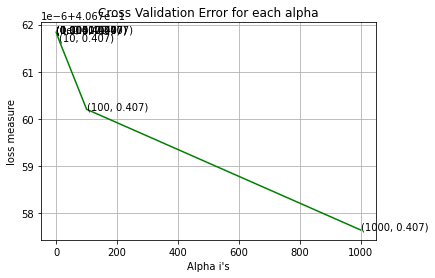

In [0]:
#code snippet taken from microsoft malware detection case study notebook-- to get the idea to get the graphs
#https://classroom.appliedcourse.com/classrooms/jEARG7xb/assignments/q2AJp9B5/users/jEARG7xb
best_alpha = np.argmin(loss_array)

fig, ax = plt.subplots()
ax.plot(alpha, loss_array,c='g')
for i, txt in enumerate(np.round(loss_array,3)):
 ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],loss_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("loss measure")
plt.show()


In [0]:
best_alpha = min(loss_array)
print("THE BEST ALPHA",best_alpha)

THE BEST ALPHA 0.4067576473714793


In [0]:
model = Ridge(alpha =best_alpha, random_state=0)
model.fit(features_train,y_train)
predict_y = model.predict(features_cv)
y_pred_train=model.predict(features_train)
y_pred_test=model.predict(features_test)

# **EVALUATION METRIC**

In [0]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_cv=mean_squared_error(y_cv,predict_y)
mse_test=mean_squared_error(y_test,y_pred_test)
r2_train=r2_score(y_train,y_pred_train)
r2_cv=r2_score(y_cv,predict_y)
r2_test=r2_score(y_test,y_pred_test)

# **REPORT**

In [0]:
#https://pypi.org/project/PrettyTable/-- for representation of data 
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists-- to add the rows in table 
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model R2 "
ptable.field_names = ['train','cv','test']
ptable.add_row([r2_train,r2_cv,r2_test])
print("********************R2 MODEL*********************")
print(ptable)
ptable1 = PrettyTable()
ptable1.title = " Model MSE "
ptable1.field_names = ['train','cv','test']
ptable1.add_row([mse_train,mse_cv,mse_test])
print("*********************MSE MODEL**********************")
print(ptable1)

********************R2 MODEL*********************
+--------------------+--------------------+--------------------+
|       train        |         cv         |        test        |
+--------------------+--------------------+--------------------+
| 0.6793376233352849 | 0.6781961151567286 | 0.6804834009486844 |
+--------------------+--------------------+--------------------+
*********************MSE MODEL**********************
+--------------------+---------------------+--------------------+
|       train        |          cv         |        test        |
+--------------------+---------------------+--------------------+
| 0.4068427067720936 | 0.40676183098805463 | 0.4035862571275307 |
+--------------------+---------------------+--------------------+


# **TRAIN,CV,TEST GRAPHS**

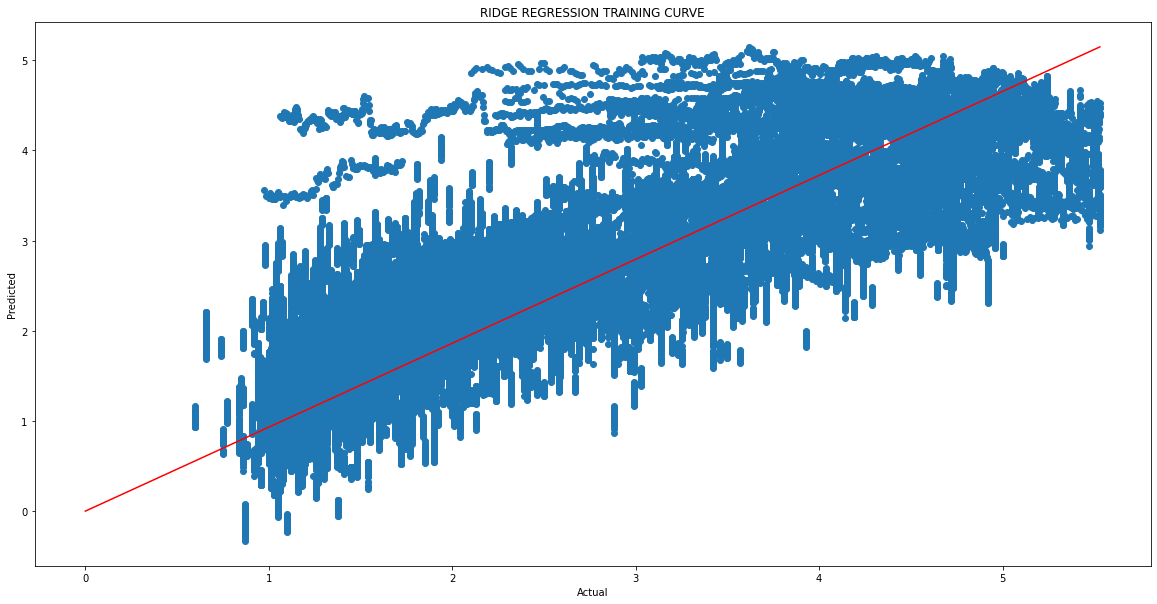

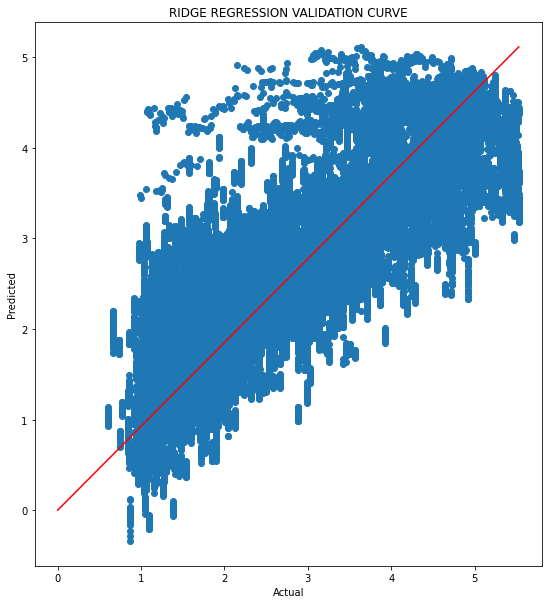

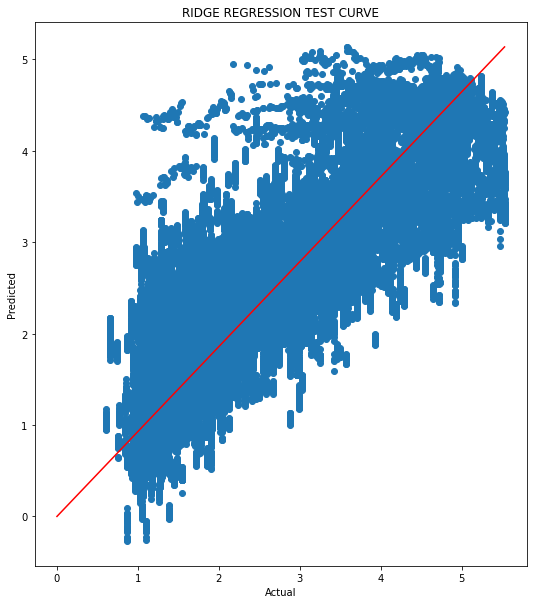

In [0]:
#https://www.kaggle.com/farrasalyafi/the-flotation
#https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process
#https://www.datasciencecentral.com/profiles/blogs/regression-analysis-how-do-i-interpret-r-squared-and-assess-the
#https://www.kaggle.com/danofer/get-minig-data-process
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="RIDGE REGRESSION TRAINING CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_train, y_pred_train)
ax.plot([0,max(y_train)], [0,max(y_pred_train)], color='r')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
ax.set(title="RIDGE REGRESSION VALIDATION CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, predict_y)
ax.plot([0,max(y_cv)], [0,max(predict_y)], color='r')
fig.show()
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.set(title="RIDGE REGRESSION TEST CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_test, y_pred_test)
ax.plot([0,max(y_test)], [0,max(y_pred_test)], color='r')
fig.show()

# **EXPLANATION**

**WHY RIDGE REGRESSION ?**

 Ridge regression is a way to create a  model when the number of predictor variables in a set exceeds the number of observations, or when a data set has ***multicollinearity (correlations between predictor variables).***
The main reason is to choose ridge regression is because of the above feature.


# **TUNING PARAMETERS**

 ALPHA IS THE TUNING PARAMETER 
 
 alpha{float, ndarray of shape (n_targets,)}, default=1.0
Regularization strength; must be a positive float. Regularization improves the conditioning of the problem and reduces the variance of the estimates. Larger values specify stronger regularization. Alpha corresponds to 1 / (2C) in other linear models such as LogisticRegression or sklearn.svm.LinearSVC. If an array is passed, penalties are assumed to be specific to the targets. Hence they must correspond in number.

##**PLOTS**


The regression model the closer the data points will fall to the fitted regression line. Theoretically, if a model could explain 100% of the variance, the fitted values would always equal the observed values and, therefore, all the data points would fall on the fitted regression line.

The points are not fall on the fitted regression line. In the test and cv curve the points are also the same as train curve and there is no difference in traion and cv and test curves.



##**METRIC COMPARISION**
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

**R2 SCORE**

Acoording to literature, the r2 score is good when it is closer to 1  and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

TRAIN R2 is not so closer to 1 and TEST r2 is also not close to 1 and hence inorder to get better result , we must try other models 

**MSE VALUE**

A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.

The train,cv,test loss are good but r2 score is not very good.




#**XGBREGRESSOR**

In [0]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

# **XgBoost  with best hyper parameters using RandomSearch**


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True,
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1,
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1,
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)
# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep]) Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
x_cfl=xgb.XGBRegressor()
prams={'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],'n_estimators':[100,200,500,1000,2000],'max_depth':[3,5,10],'colsample_bytree':[0.1,0.3,0.5,1],'subsample':[0.1,0.3,0.5,1]}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(features_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   35.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.2min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 95.2min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 138.1min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 151.6min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 262.3min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 304.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 324.1min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed: 335.0min finished


[22:09:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alp...
                                          seed=None, silent=None, subsample=1,
                                          verbosity=1),
                   iid='deprecated', n_iter=10, n_job

# **TRAINING WITH BEST PARAMETERS**

In [0]:
print (random_cfl1.best_params_)

{'subsample': 0.1, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 1}


In [0]:
# Training a hyper-parameter tuned Xg-Boost regressor on our train data
# find more about XGBREGRESSORfunction here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBREGESSOR
# -------------------------
# default paramters
# class xgboost.XGBREGRESSOR(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True,
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=NoNe, gamma=0, min_child_weight=1,
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=
1, reg_alpha=0, reg_lambda=1,
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)
# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep]) Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with dat

# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link2: https://www.appliedaicourse.com/course/applied-ai-course
-online/lessons/what-are-ensembles/
model=xgb.XGBRegressor(max_depth=10 ,learning_rate=0.01,n_estimators=1000 ,verbose=2,subsample=0.1,colsample_bytree=1)
model.fit(features_train,y_train)

[01:13:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.1, verbose=2, verbosity=1)

# **MODEL TRAINING, PLOTS, PREDICTION , EVAULATION**

In [0]:
y_pred=model.predict(features_cv)

In [0]:
r2_score(y_cv,y_pred)

0.9773658789974008

In [0]:
y_pred_train=model.predict(features_train)

In [0]:
mse_train=mean_squared_error(y_train,y_pred_train)

In [0]:
mse_cv=mean_squared_error(y_pred,y_cv)

In [0]:
r2_score(y_train,y_pred_train)

0.9795944830941742

# **train,validation curves**

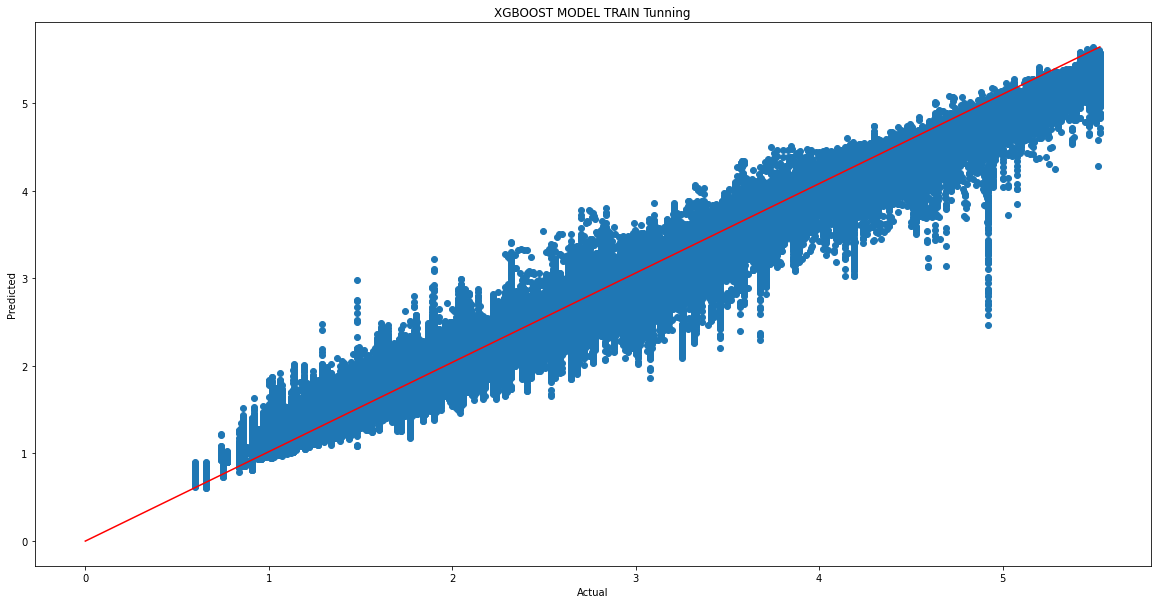

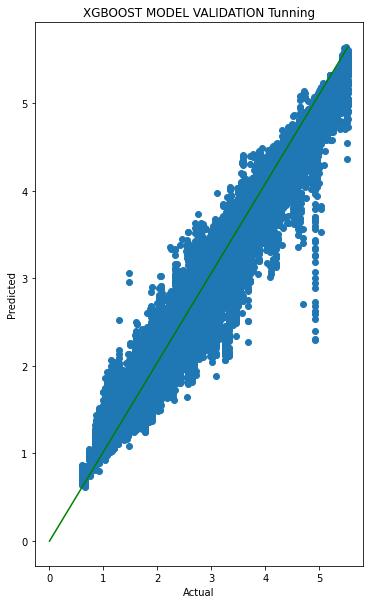

In [0]:
#https://www.kaggle.com/farrasalyafi/the-flotation
#https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process
#https://www.datasciencecentral.com/profiles/blogs/regression-analysis-how-do-i-interpret-r-squared-and-assess-the
#https://www.kaggle.com/danofer/get-minig-data-process
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="XGBOOST MODEL TRAIN Tunning", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_train, y_pred_train)
ax.plot([0,max(y_train)], [0,max(y_pred_train)], color='r')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(131)
ax.set(title="XGBOOST MODEL VALIDATION Tunning", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, y_pred)
ax.plot([0,max(y_cv)], [0,max(y_pred)], color='g')
fig.show()

In [0]:
mse_cv,mse_train

(0.028609649962138804, 0.02588964697823065)

In [0]:
y_pred_test=model.predict(features_test)

In [0]:
mse_test=mean_squared_error(y_test,y_pred_test)

In [0]:
r2_score(y_test,y_pred_test)

0.9775210369328332

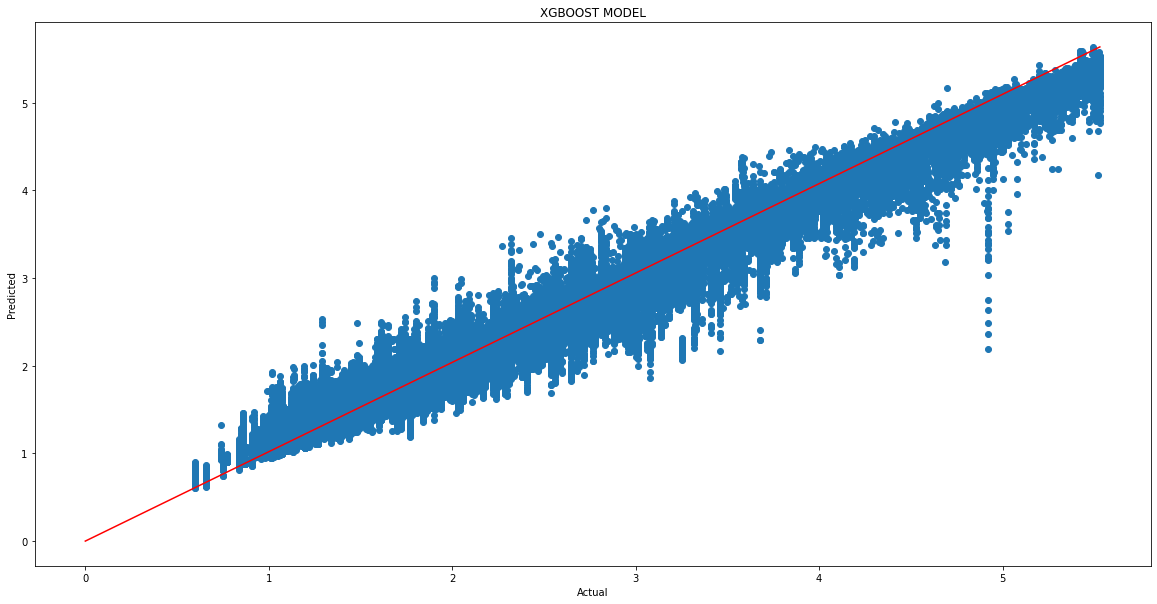

In [0]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="XGBOOST MODEL", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_test, y_pred_test)
ax.plot([0,max(y_test)], [0,max(y_pred_test)], color='r')
fig.show()

# **REPORT**

In [0]:
#https://pypi.org/project/PrettyTable/-- for representation of data 
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists-- to add the rows in table 
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model R2 "
ptable.field_names = ['train','cv','test']
ptable.add_row([0.9795944830941742,0.9773658789974008,0.9775210369328332])
print("********************R2 MODEL*********************")
print(ptable)
ptable1 = PrettyTable()
ptable1.title = " Model MSE "
ptable1.field_names = ['train','cv','test']
ptable1.add_row([ 0.02588964697823065,0.028609649962138804,0.0306096499621388])
print("*********************MSE MODEL**********************")
print(ptable1)

********************R2 MODEL*********************
+--------------------+--------------------+--------------------+
|       train        |         cv         |        test        |
+--------------------+--------------------+--------------------+
| 0.9795944830941742 | 0.9773658789974008 | 0.9775210369328332 |
+--------------------+--------------------+--------------------+
*********************MSE MODEL**********************
+---------------------+----------------------+--------------------+
|        train        |          cv          |        test        |
+---------------------+----------------------+--------------------+
| 0.02588964697823065 | 0.028609649962138804 | 0.0306096499621388 |
+---------------------+----------------------+--------------------+


#  **EXPLANATION**

Since , the ridge regression shows less perfomance metric inorder to enchance the metric of the model . The XGBoost is used because of faster performance and gretaer performance

# **TUNING PARAMATERS**

Tune tree-specific parameters ( max_depth, min_child_weight, gamma, subsample, colsample_bytree) for decided learning rate and number of trees.

The parameters are decided using randomsearch cv.
#sklearn.model_selection.RandomizedSearchCV¶
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

The random search cv is used to get best hyperparameters.


##**PLOTS**


The regression model the closer the data points will fall to the fitted regression line. Theoretically, if a model could explain 100% of the variance, the fitted values would always equal the observed values and, therefore, all the data points would fall on the fitted regression line.

The points  fall on the fitted regression line. In the test and cv curve the points are also the same as train curve and there is no difference in traion and cv and test curves.
When compared with the ridge model , the plot is musch better and most of points fall on the regresssion line.


##**METRIC COMPARISION**
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

**R2 SCORE**

Acoording to literature, the r2 score is good when it is closer to 1  and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

TRAIN R2 is  so closer to 1 and TEST r2 is also  close to 1 and hence inorder to get better result , we must try other models 

**MSE VALUE**

A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.

The train,cv,test loss are good but r2 score is also good.

# **DECISION TREE REGRESSOR**

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('/content/drive/My Drive/preprocessed_time')

In [0]:
y = df['% Silica Concentrate']
X = df.drop(['% Silica Concentrate','index','datetime hours'], axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [0]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,test_size=0.20,random_state=30)

In [0]:
from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler()
features_train = scale_features_std.fit_transform(X_train)
features_test = scale_features_std.transform(X_test)

In [0]:
features_cv = scale_features_std.transform(X_cv)

In [0]:
print(X_train.shape,features_train.shape,X_test.shape,features_test.shape,features_cv.shape,y_train.shape)

(471969, 22) (471969, 22) (147491, 22) (147491, 22) (117993, 22) (471969,)


In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


# **DECISION TREE HYPERPARAMATERS TUNING USING RANDOM SEARCH CV**

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decision%20tree%20regressor#sklearn.tree.DecisionTreeRegressor
#https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3064/decision-tree
##sklearn.model_selection.RandomizedSearchCV¶
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
#The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.

dt2 = DecisionTreeRegressor()
se=dt2.fit(features_train,y_train)
parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10,100, 500]}
cfl2=RandomizedSearchCV(dt2,param_distributions=parameters,verbose=10,n_jobs=-1,)
se2 = cfl2.fit(features_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.4min finished


In [0]:
print(cfl2.best_estimator_)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=50,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


In [0]:
best_tune_parameters=[{'max_depth':[50], 'min_samples_split':[5] }]

# **MODEL TRAINING**

In [0]:
clf=DecisionTreeRegressor (max_depth=50,min_samples_split=5)
clf.fit(features_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=50,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
y_pred=clf.predict(features_cv)


In [0]:
y_pred_train=clf.predict(features_train)
y_pred_test=clf.predict(features_test)

# **EVALUATION METRIC**

In [0]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
mse_cv=mean_squared_error(y_cv,y_pred)
r2_cv=r2_score(y_cv,y_pred)
r2_train=r2_score(y_train,y_pred_train)

r2_test=r2_score(y_test,y_pred_test)

#**PLOTS**

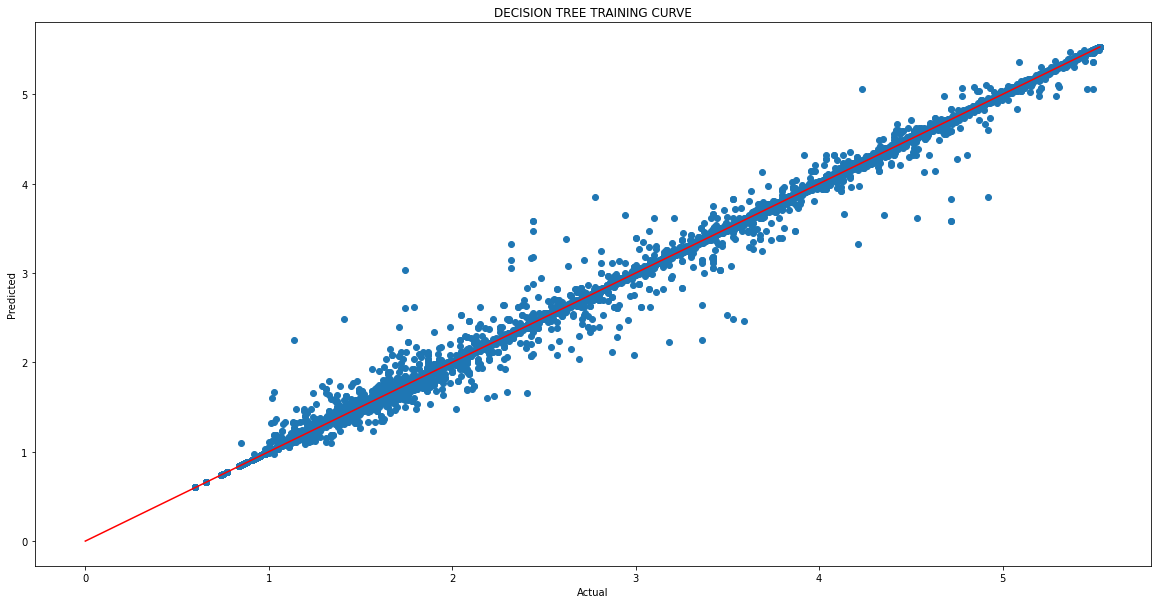

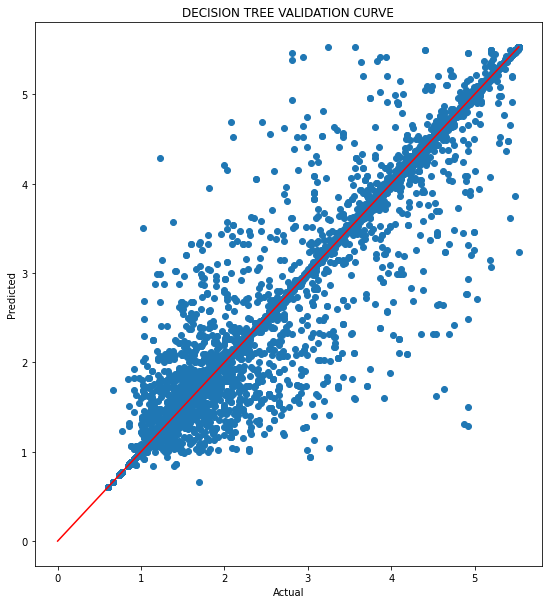

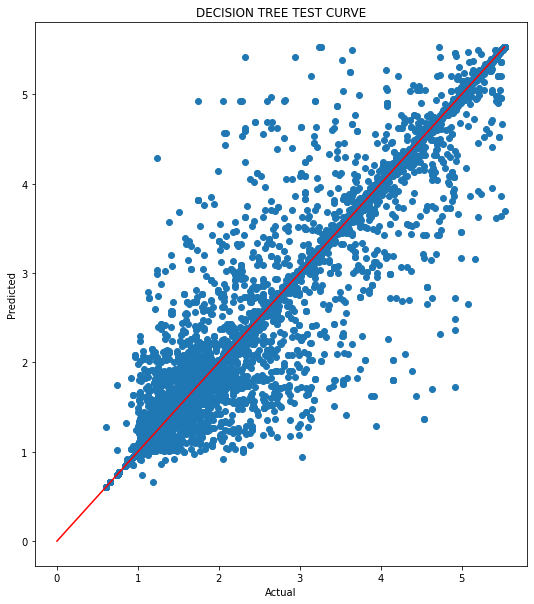

In [0]:
#https://www.kaggle.com/farrasalyafi/the-flotation
#https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process
#https://www.datasciencecentral.com/profiles/blogs/regression-analysis-how-do-i-interpret-r-squared-and-assess-the
#https://www.kaggle.com/danofer/get-minig-data-process

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="DECISION TREE TRAINING CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_train, y_pred_train)
ax.plot([0,max(y_train)], [0,max(y_pred_train)], color='r')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
ax.set(title="DECISION TREE VALIDATION CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, y_pred)
ax.plot([0,max(y_cv)], [0,max(y_pred)], color='r')
fig.show()
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.set(title="DECISION TREE TEST CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_test, y_pred_test)
ax.plot([0,max(y_test)], [0,max(y_pred_test)], color='r')
fig.show()

from sklearn.ensemble import RandomForestRegressor
fig.show()

In [0]:
r2_test,r2_train,mse_cv,mse_test,mse_train

(0.9928184073341917,
 0.9998788183828305,
 0.008583147579681304,
 0.009071178501567047,
 0.00015375005216709757)

In [0]:
#https://pypi.org/project/PrettyTable/-- for representation of data 
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists-- to add the rows in table 
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model R2 "
ptable.field_names = ['train','cv','test']
ptable.add_row([0.9998788183828305,0.9993658789974008,0.9928184073341917])
print("********************R2 *********************")
print(ptable)
ptable1 = PrettyTable()
ptable1.title = " Model MSE "
ptable1.field_names = ['train','cv','test']
ptable1.add_row([ 0.00015375005216709757,0.008583147579681304,0.009071178501567047])
print("*********************MSE **********************")
print(ptable1)

********************R2 *********************
+--------------------+--------------------+--------------------+
|       train        |         cv         |        test        |
+--------------------+--------------------+--------------------+
| 0.9998788183828305 | 0.9993658789974008 | 0.9928184073341917 |
+--------------------+--------------------+--------------------+
*********************MSE **********************
+------------------------+----------------------+----------------------+
|         train          |          cv          |         test         |
+------------------------+----------------------+----------------------+
| 0.00015375005216709757 | 0.008583147579681304 | 0.009071178501567047 |
+------------------------+----------------------+----------------------+


#**EXPLANATION**

Decision tree regression observes features of an object and trains a model in the structure of a tree to predict data in the future to produce meaningful continuous output.

Easy to interept.

# **TUNING PARAMATERS**

The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.


Hence, randomsearch cv is used to find the best hyperparamaters tat is max_depth and min_samples_leaf and using the best values we can tune the model.

#**PLOTS**


The regression model the closer the data points will fall to the fitted regression line. Theoretically, if a model could explain 100% of the variance, the fitted values would always equal the observed values and, therefore, all the data points would fall on the fitted regression line.

The points  fall on the fitted regression line. In the test and cv curve the points are are not falling as we obseerve in  train curve and there is difference in train and cv and test curves.

When compared with the xgboost model , the plot is so better and most of points fall on the regresssion line.

The train curve , the points are falling on the line perefctly and there is no much difference between actual and predicted

# **METRIC COMPARISION**
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

**R2 SCORE**

Acoording to literature, the r2 score is good when it is closer to 1  and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

TRAIN R2 is APPROMIXATEMLY EQUAL to 1 and TEST r2 is also close to 1 and hence inorder to get better result , we must try other models 

**MSE VALUE**

A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.

The train,cv,test loss are good but r2 score is also good.


Decision tree has given much better resulst than other models


# **RANDOMFOREST REGRESSOR**

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
from sklearn.model_selection import RandomizedSearchCV

#**RANDOMFOREST REGRESSOR BEST HYPERPARAMATER TUNING USING RANDOMSEARCH CV**

In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=randomforest#sklearn.ensemble.RandomForestRegressor
#A random forest regressor.A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.
#he default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.

#The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data, max_features=n_features and bootstrap=False, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, random_state has to be fixed.

#The default value max_features="auto" uses n_features rather than n_features / 3. The latter was originally suggested in [1], whereas the former was more recently justified empirically in .

param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [0]:
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = rf,param_distributions= param_grid, 
                          cv = 3,n_jobs=-1, verbose = 2)

In [0]:
grid_search.fit(features_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 111.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 1000}

# **MODEL TUNING**

In [0]:

model=RandomForestRegressor(n_estimators=1000,max_depth=100,min_samples_leaf=5,min_samples_split=10,bootstrap=True,max_features=3)

In [0]:
model.fit(features_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred=model.predict(features_cv)
y_pred_train=model.predict(features_train)
y_pred_test=model.predict(features_test)

# **EVALUATION METRIC**

In [0]:

mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
mse_cv=mean_squared_error(y_cv,y_pred)

r2_train=r2_score(y_train,y_pred_train)

r2_test=r2_score(y_test,y_pred_test)
r2_cv=r2_score(y_cv,y_pred)

# **PLOTS**

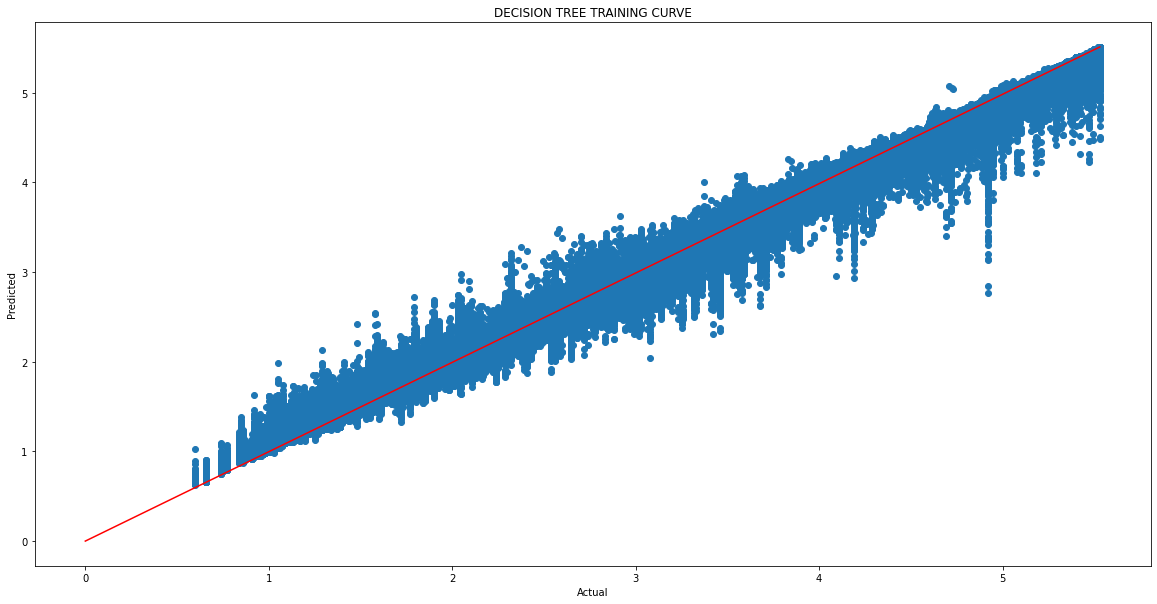

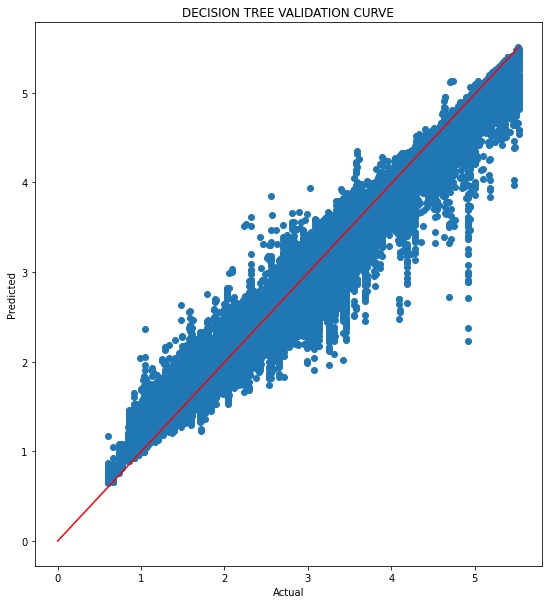

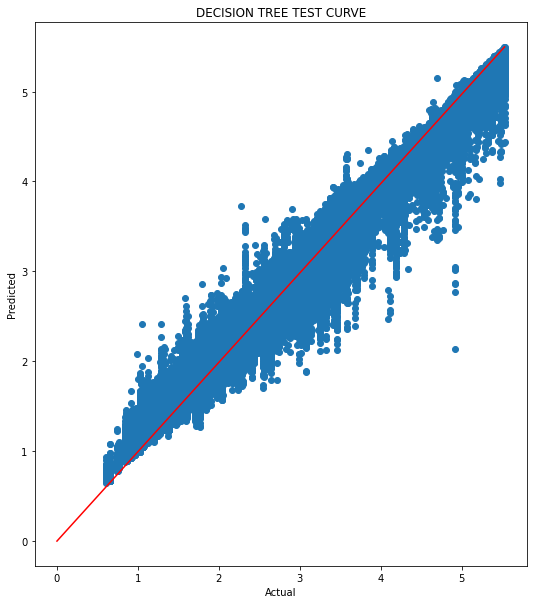

In [0]:
#https://www.kaggle.com/farrasalyafi/the-flotation
#https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process
#https://www.datasciencecentral.com/profiles/blogs/regression-analysis-how-do-i-interpret-r-squared-and-assess-the
#https://www.kaggle.com/danofer/get-minig-data-process

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="DECISION TREE TRAINING CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_train, y_pred_train)
ax.plot([0,max(y_train)], [0,max(y_pred_train)], color='r')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
ax.set(title="DECISION TREE VALIDATION CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, y_pred)
ax.plot([0,max(y_cv)], [0,max(y_pred)], color='r')
fig.show()
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.set(title="DECISION TREE TEST CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_test, y_pred_test)
ax.plot([0,max(y_test)], [0,max(y_pred_test)], color='r')
fig.show()



In [0]:
r2_train,r2_test,r2_cv,mse_cv,mse_test,mse_train


(0.991440126326125,
 0.9822978140228872,
 0.9822558920629562,
 0.02242864730249243,
 0.022359899306298725,
 0.010860401557953387)

In [0]:
#https://pypi.org/project/PrettyTable/-- for representation of data 
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists-- to add the rows in table 
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model R2 "
ptable.field_names = ['train','cv','test']
ptable.add_row([0.991440126326125, 0.9822558920629562, 0.9822978140228872])
print("********************R2 *********************")
print(ptable)
ptable1 = PrettyTable()
ptable1.title = " Model MSE "
ptable1.field_names = ['train','cv','test']
ptable1.add_row([ 0.010860401557953387,0.02242864730249243,0.022359899306298725])
print("*********************MSE **********************")
print(ptable1)

********************R2 *********************
+-------------------+--------------------+--------------------+
|       train       |         cv         |        test        |
+-------------------+--------------------+--------------------+
| 0.991440126326125 | 0.9822558920629562 | 0.9822978140228872 |
+-------------------+--------------------+--------------------+
*********************MSE **********************
+----------------------+---------------------+----------------------+
|        train         |          cv         |         test         |
+----------------------+---------------------+----------------------+
| 0.010860401557953387 | 0.02242864730249243 | 0.022359899306298725 |
+----------------------+---------------------+----------------------+


#**EXPLANATION**

 #https://www.kaggle.com/rogerbellavista/randomforestregressor-mae-0-0922-rmse-0-2314

According to the kaggle refrenec notebooks, the randomforest gives better result . As a experiment we have tried to replicate the model with tuning features and obtained results

#**TUNING PARAMATERS**
#https://towardsdatascience.com/random-forest-and-its-implementation-71824ced454f
The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.

The features are always randomly permuted at each split. Therefore, the best found split may vary, even with the same training data, max_features=n_features and bootstrap=False, if the improvement of the criterion is identical for several splits enumerated during the search of the best split. To obtain a deterministic behaviour during fitting, random_state has to be fixed.

#**PLOTS**

The regression model the closer the data points will fall to the fitted regression line. Theoretically, if a model could explain 100% of the variance, the fitted values would always equal the observed values and, therefore, all the data points would fall on the fitted regression line.

The points  fall on the fitted regression line. In the test and cv curve the points are falling as we obseerve in  train curve and there is no difference in train and cv and test curves.

When compared with the xgboost model , the plot is so better and most of points fall on the regresssion line.

The train curve , the points are falling on the line perefctly and there is no much difference between actual and predicted

# **METRIC COMPARISION**
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

**R2 SCORE**

Acoording to literature, the r2 score is good when it is closer to 1  and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

TRAIN R2 is APPROMIXATEMLY EQUAL to 1 and TEST r2 is  close to 1 and hence inorder to get better result , we must try other models 

**MSE VALUE**

A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.

The train,cv,test loss are good but r2 score is also good.


Randomforest has given much better results

# **MODELS WITHOUT IRON CONCENTRATE**

#**DECISION TREE REGREGRESSOR WITHOUT IRON CONCENTRATE**

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('/content/drive/My Drive/preprocessed_time')

In [0]:
y = df['% Silica Concentrate']
X = df.drop(['% Silica Concentrate','index','datetime hours','% Iron Concentrate'], axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [0]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,test_size=0.20,random_state=30)

In [0]:
from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler()
features_train = scale_features_std.fit_transform(X_train)
features_test = scale_features_std.transform(X_test)

In [0]:
features_cv = scale_features_std.transform(X_cv)

In [0]:
print(X_train.shape,features_train.shape,X_test.shape,features_test.shape,features_cv.shape,y_train.shape)

(471969, 21) (471969, 21) (147491, 21) (147491, 21) (117993, 21) (471969,)


#**DECISION TREE REGRESSOR BEST HYPERPARAMATER TUNING USING RANDOM SEARCH CV**

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


In [0]:
#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html?highlight=decision%20tree%20regressor#sklearn.tree.DecisionTreeRegressor
#https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3064/decision-tree
##sklearn.model_selection.RandomizedSearchCV¶
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
#The default values for the parameters controlling the size of the trees (e.g. max_depth, min_samples_leaf, etc.) lead to fully grown and unpruned trees which can potentially be very large on some data sets. To reduce memory consumption, the complexity and size of the trees should be controlled by setting those parameter values.dt2 = DecisionTreeRegressor()
se=dt2.fit(features_train,y_train)
parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10,100, 500]}
cfl2=RandomizedSearchCV(dt2,param_distributions=parameters,verbose=10,n_jobs=-1,)
se2 = cfl2.fit(features_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   29.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   48.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  6.1min finished


In [0]:
print(cfl2.best_estimator_)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=50,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


In [0]:
best_tune_parameters=[{'max_depth':[50], 'min_samples_split':[5] }]

#**MODEL TRAINING** **AND PREDICTION**

In [0]:
clf=DecisionTreeRegressor (max_depth=50,min_samples_split=5)
clf.fit(features_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=50,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

#**EVALUATION METRIC**

In [0]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [0]:
y_pred=clf.predict(features_cv)


In [0]:
r2_cv=r2_score(y_cv,y_pred)

In [0]:
y_pred_train=clf.predict(features_train)
y_pred_test=clf.predict(features_test)

In [0]:
import matplotlib.pyplot as plt


In [0]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
mse_cv=mean_squared_error(y_cv,y_pred)

r2_train=r2_score(y_train,y_pred_train)

r2_test=r2_score(y_test,y_pred_test)

#**PLOTS**

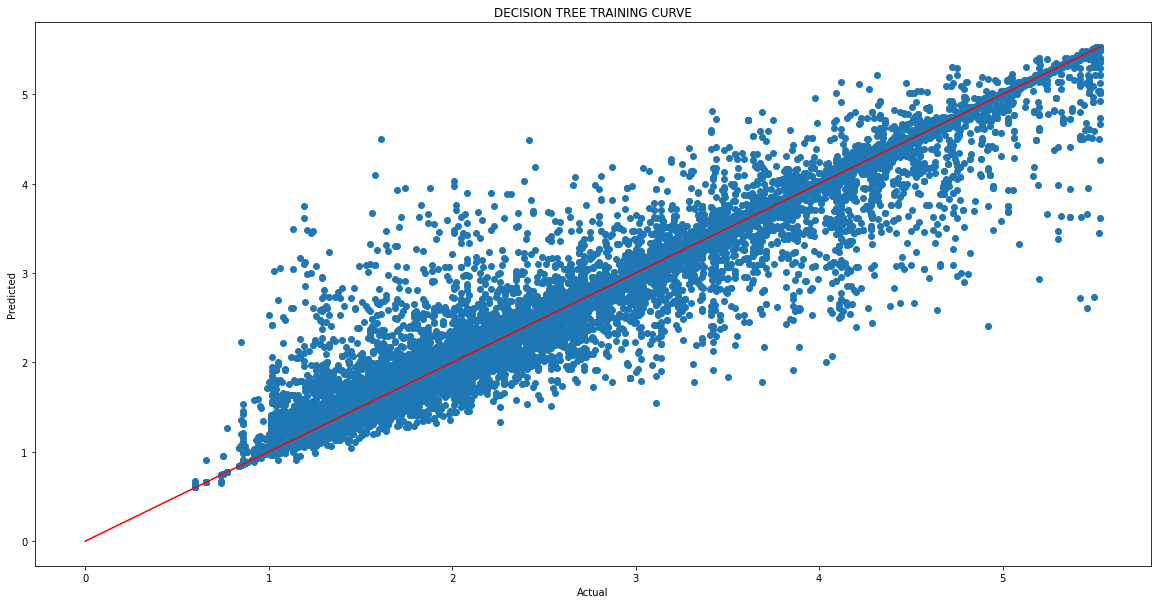

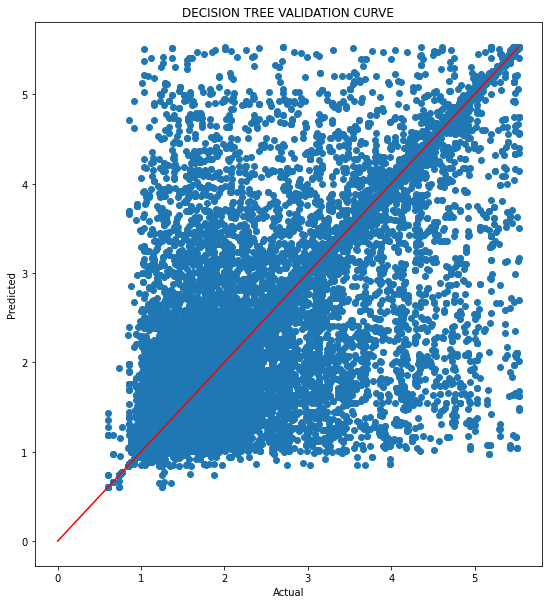

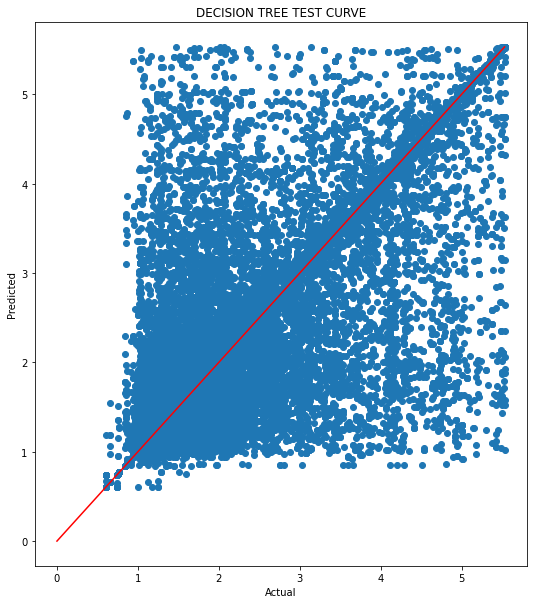

In [0]:
#https://www.kaggle.com/farrasalyafi/the-flotation
#https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process
#https://www.datasciencecentral.com/profiles/blogs/regression-analysis-how-do-i-interpret-r-squared-and-assess-the
#https://www.kaggle.com/danofer/get-minig-data-process




fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="DECISION TREE TRAINING CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_train, y_pred_train)
ax.plot([0,max(y_train)], [0,max(y_pred_train)], color='r')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
ax.set(title="DECISION TREE VALIDATION CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, y_pred)
ax.plot([0,max(y_cv)], [0,max(y_pred)], color='r')
fig.show()
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.set(title="DECISION TREE TEST CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_test, y_pred_test)
ax.plot([0,max(y_test)], [0,max(y_pred_test)], color='r')
fig.show()

from sklearn.ensemble import RandomForestRegressor
fig.show()

In [0]:
r2_test,r2_train,r2_cv,mse_cv,mse_test,mse_train

(0.8944468070516213,
 0.9967871967266184,
 0.9000528642649994,
 0.12633371394313822,
 0.1333258372065188,
 0.004076267361529295)

In [0]:
#https://pypi.org/project/PrettyTable/-- for representation of data 
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists-- to add the rows in table 
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model R2 "
ptable.field_names = ['train','cv','test']
ptable.add_row([0.9967871967266184,0.9000528642649994,0.8944468070516213])
print("********************R2 MODEL*********************")
print(ptable)
ptable1 = PrettyTable()
ptable1.title = " Model MSE "
ptable1.field_names = ['train','cv','test']
ptable1.add_row([0.004076267361529295,0.12633371394313822, 0.1333258372065188])
print("*********************MSE MODEL**********************")
print(ptable1)

********************R2 MODEL*********************
+--------------------+--------------------+--------------------+
|       train        |         cv         |        test        |
+--------------------+--------------------+--------------------+
| 0.9967871967266184 | 0.9000528642649994 | 0.8944468070516213 |
+--------------------+--------------------+--------------------+
*********************MSE MODEL**********************
+----------------------+---------------------+--------------------+
|        train         |          cv         |        test        |
+----------------------+---------------------+--------------------+
| 0.004076267361529295 | 0.12633371394313822 | 0.1333258372065188 |
+----------------------+---------------------+--------------------+


#**METRIC COMPARISON BETWEEN WITH AND WITHOUT CONCENTRATE**

1. R2 SCORE WITH IRON CONCENTRATE IS BETTER THAN MODEL WITHOUT IRON CONCENTRATE. THE MSE VALUES ARE ALSO BETTER THAN MODEL WITHOUT IRON CONCENTRATE.
PREDICTING SILICA WITHOUT IRON DOES NOT GIVE BETTER RESULTS. WITH THE DOMAIN KNOWLEDGE , THE ONLY WAY TO PREDICT SILICA CONCENTRATE IS TO LAG THE PREDICTION OF IRON CONCENTRATE WHILE DOING EXPERIMENTS PREDICT THE SILICA AFTERWARDS. 

#**PLOT COMPASRION**

THE EVALUATION METRIC TELLS QUANTITAVELY WHILE THE PLOTS TELLS GRAPHICALLY 
IT IS VERY CLEAR THAT FROM BOTH THE GRAPHS HOW THE IRON CONCENTRATE PLAYS IMPORTANT ROLE IN THE PREDICTION.

**TRAIN CURVE::**

 THE POINTS ARE FALLING SIMILAR TO THE TRAIN CURVE IN WITH IRON CONCENTRATE WITH SLIGHT DIFFERENCE.

**TESTAND VALIDATION CURVE**

THE POINTS ARE TOTALLY OUT OF LINE AND THIS TELLS THAT IRON CONCENTRATE PLAYS A MAJOR ROLE IN PREDICTING THE OUTPUT DURING THE TEST TIME.



#**INFERENCES**

PREDICTING SILICA WITHOUT IRON DOES NOT GIVE BETTER RESULTS. WITH THE DOMAIN KNOWLEDGE , THE ONLY WAY TO PREDICT SILICA CONCENTRATE IS TO LAG THE PREDICTION OF IRON CONCENTRATE WHILE DOING EXPERIMENTS PREDICT THE SILICA AFTERWARDS. 

ACCORDING TO DOMAIN KNOWLEDGE, BOTH IRON AND SILICA CONCENTRATE ARE TAKEN AS TARGET VARIBALES AND USING MULTI-TARGET REGRESSION THEY ARE PREDICTED .
https://ieeexplore.ieee.org/abstract/document/8907120


#**RANDOMFOREST REGRESSOR**

##**HYPERPARAMATER TUNING**

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
from sklearn.model_selection import RandomizedSearchCV

In [0]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [0]:
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = rf,param_distributions= param_grid, 
                          cv = 3,n_jobs=-1, verbose = 2)

In [0]:
grid_search.fit(features_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 111.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 1000}

#**MODELING AND TRAINING**

In [0]:
model=RandomForestRegressor(n_estimators=1000,max_depth=100,min_samples_leaf=5,min_samples_split=10,bootstrap=True,max_features=3)

In [0]:
model.fit(features_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [0]:
y_pred=model.predict(features_cv)
y_pred_train=model.predict(features_train)
y_pred_test=model.predict(features_test)

#**EVALUATION METRIC**

In [0]:

mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
mse_cv=mean_squared_error(y_cv,y_pred)

r2_train=r2_score(y_train,y_pred_train)

r2_test=r2_score(y_test,y_pred_test)
r2_cv=r2_score(y_cv,y_pred)

#**PLOTS**

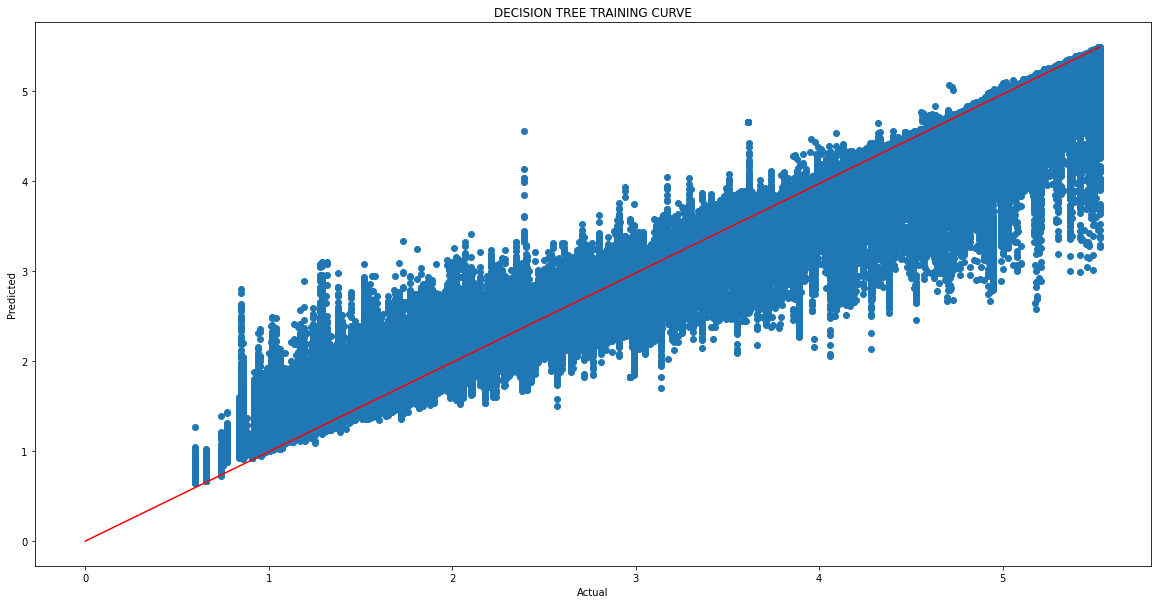

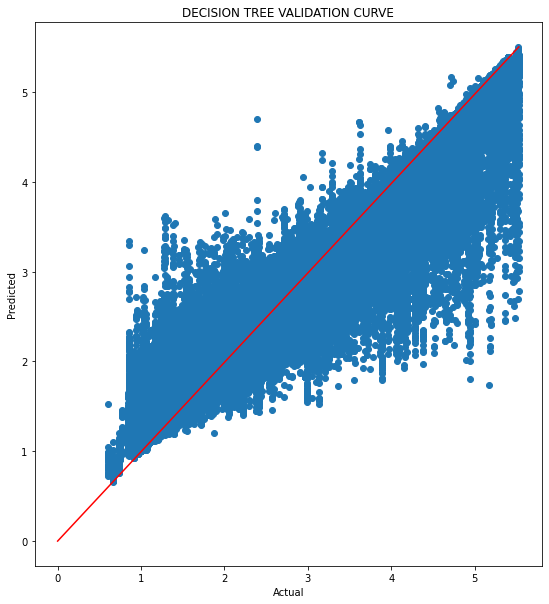

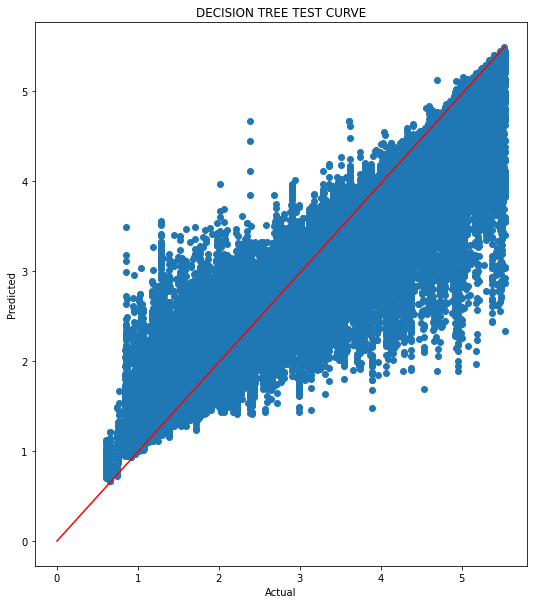

In [0]:
#https://www.kaggle.com/farrasalyafi/the-flotation
#https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process
#https://www.datasciencecentral.com/profiles/blogs/regression-analysis-how-do-i-interpret-r-squared-and-assess-the
#https://www.kaggle.com/danofer/get-minig-data-process


fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="DECISION TREE TRAINING CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_train, y_pred_train)
ax.plot([0,max(y_train)], [0,max(y_pred_train)], color='r')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
ax.set(title="DECISION TREE VALIDATION CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, y_pred)
ax.plot([0,max(y_cv)], [0,max(y_pred)], color='r')
fig.show()
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.set(title="DECISION TREE TEST CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_test, y_pred_test)
ax.plot([0,max(y_test)], [0,max(y_pred_test)], color='r')
fig.show()



In [0]:
r2_train,r2_test,r2_cv,mse_cv,mse_test,mse_train


(0.9420480289938656,
 0.8810794061401998,
 0.8822738867246521,
 0.148806436610639,
 0.15021040382178036,
 0.07352698184347983)

In [0]:
#https://pypi.org/project/PrettyTable/-- for representation of data 
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists-- to add the rows in table 
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model R2 "
ptable.field_names = ['train','cv','test']
ptable.add_row([0.9420480289938656, 0.8822738867246521,0.8810794061401998])
print("********************R2 MODEL*********************")
print(ptable)
ptable1 = PrettyTable()
ptable1.title = " Model MSE "
ptable1.field_names = ['train','cv','test']
ptable1.add_row([0.07352698184347983,0.148806436610639,0.15021040382178036])
print("*********************MSE MODEL**********************")
print(ptable1)

********************R2 MODEL*********************
+--------------------+--------------------+--------------------+
|       train        |         cv         |        test        |
+--------------------+--------------------+--------------------+
| 0.9420480289938656 | 0.8822738867246521 | 0.8810794061401998 |
+--------------------+--------------------+--------------------+
*********************MSE MODEL**********************
+---------------------+-------------------+---------------------+
|        train        |         cv        |         test        |
+---------------------+-------------------+---------------------+
| 0.07352698184347983 | 0.148806436610639 | 0.15021040382178036 |
+---------------------+-------------------+---------------------+


#**METRIC COMPARSION**

1. R2 SCORE WITH IRON CONCENTRATE IS BETTER THAN MODEL WITHOUT IRON CONCENTRATE. THE MSE VALUES ARE ALSO BETTER THAN MODEL WITHOUT IRON CONCENTRATE.
PREDICTING SILICA WITHOUT IRON DOES NOT GIVE BETTER RESULTS. WITH THE DOMAIN KNOWLEDGE , THE ONLY WAY TO PREDICT SILICA CONCENTRATE IS TO LAG THE PREDICTION OF IRON CONCENTRATE WHILE DOING EXPERIMENTS PREDICT THE SILICA AFTERWARDS. 

2. WHEN WE COMPARE DECIUSION AND RANDOMFOREST , DECISION TREE IS STILL DOING BETTER PERFORMANCE THANT RF 

#**PLOTS COMPARISION**


THE EVALUATION METRIC TELLS QUANTITAVELY WHILE THE PLOTS TELLS GRAPHICALLY 
IT IS VERY CLEAR THAT FROM BOTH THE GRAPHS HOW THE IRON CONCENTRATE PLAYS IMPORTANT ROLE IN THE PREDICTION.

**TRAIN CURVE::**

 THE POINTS ARE FALLING SIMILAR TO THE TRAIN CURVE IN WITH IRON CONCENTRATE WITH SLIGHT DIFFERENCE.

**TESTAND VALIDATION CURVE**

THE POINTS ARE TOTALLY OUT OF LINE AND THIS TELLS THAT IRON CONCENTRATE PLAYS A MAJOR ROLE IN PREDICTING THE OUTPUT DURING THE TEST TIME.

WHEN WE COMPARE DECISION TREE, THOUGH DT IS BETTER WITH R2 SCORE BUT RANDOM FOREST IS BETTER WHEN WE COMAPRE THE TEST AND VALIDATION CURVE.

#**INFERENCES**

PREDICTING SILICA WITHOUT IRON DOES NOT GIVE BETTER RESULTS. WITH THE DOMAIN KNOWLEDGE , THE ONLY WAY TO PREDICT SILICA CONCENTRATE IS TO LAG THE PREDICTION OF IRON CONCENTRATE WHILE DOING EXPERIMENTS PREDICT THE SILICA AFTERWARDS. 

ACCORDING TO DOMAIN KNOWLEDGE, BOTH IRON AND SILICA CONCENTRATE ARE TAKEN AS TARGET VARIBALES AND USING MULTI-TARGET REGRESSION THEY ARE PREDICTED .
https://ieeexplore.ieee.org/abstract/document/8907120

#**XGBOOST**

In [0]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import pandas as pd

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df=pd.read_csv('/content/drive/My Drive/preprocessed_time')

In [0]:
y = df['% Silica Concentrate']
X = df.drop(['% Silica Concentrate','index','datetime hours','% Iron Concentrate'], axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [0]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,test_size=0.20,random_state=30)

In [0]:
from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler()
features_train = scale_features_std.fit_transform(X_train)
features_test = scale_features_std.transform(X_test)

In [0]:
features_cv = scale_features_std.transform(X_cv)

In [0]:
print(X_train.shape,features_train.shape,X_test.shape,features_test.shape,features_cv.shape,y_train.shape)

(471969, 21) (471969, 21) (147491, 21) (147491, 21) (117993, 21) (471969,)


#**xgboost hyperparamter**

In [0]:
import xgboost as xgb

from sklearn.model_selection import RandomizedSearchCV# Training a hyper-parameter tuned Xg-Boost regressor on our train data
# find more about XGBClassifier function here http://xgboost.readthedocs.io/en/latest/python/python_api.html?#xgboost.XGBClassifier
# -------------------------
# default paramters
# class xgboost.XGBClassifier(max_depth=3, learning_rate=0.1, n_estimators=100, silent=True,
# objective='binary:logistic', booster='gbtree', n_jobs=1, nthread=None, gamma=0, min_child_weight=1,
# max_delta_step=0, subsample=1, colsample_bytree=1, colsample_bylevel=1, reg_alpha=0, reg_lambda=1,
# scale_pos_weight=1, base_score=0.5, random_state=0, seed=None, missing=None, **kwargs)
# some of methods of RandomForestRegressor()
# fit(X, y, sample_weight=None, eval_set=None, eval_metric=None, early_stopping_rounds=None, verbose=True, xgb_model=None)
# get_params([deep]) Get parameters for this estimator.
# predict(data, output_margin=False, ntree_limit=0) : Predict with data. NOTE: This function is not thread safe.
# get_score(importance_type='weight') -> get the feature importance
# -----------------------
# video link1: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/regression-using-decision-trees-2/
# video link2: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/what-are-ensembles/
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html
x_cfl=xgb.XGBRegressor()
prams={'learning_rate':[0.01,0.03,0.05,0.1,0.15,0.2],'n_estimators':[100,200,500,1000,2000],'max_depth':[3,5,10],'colsample_bytree':[0.1,0.3,0.5,1],'subsample':[0.1,0.3,0.5,1]}
random_cfl1=RandomizedSearchCV(x_cfl,param_distributions=prams,verbose=10,n_jobs=-1,)
random_cfl1.fit(features_train,y_train)


In [0]:
print (random_cfl1.best_params_)

#**MODELING TUNING AND EVALUTION METRIC**

In [0]:
model=xgb.XGBRegressor(max_depth=10 ,learning_rate=0.01,n_estimators=1000 ,verbose=2,subsample=0.1,colsample_bytree=1)
model.fit(features_train,y_train)

[03:16:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.1, verbose=2, verbosity=1)

In [0]:
y_pred=model.predict(features_cv)

In [0]:
y_pred_train=model.predict(features_train)

In [0]:
mse_train=mean_squared_error(y_train,y_pred_train)

In [0]:
r2_score(y_cv,y_pred)

0.8075437262359364

In [0]:
r2_score(y_cv,y_pred)

0.8075437262359364

In [0]:
mse_cv=mean_squared_error(y_pred,y_cv)

In [0]:
r2_score(y_train,y_pred_train)

0.8237317967008811

In [0]:
y_pred_test=model.predict(features_test)

In [0]:
mse_test=mean_squared_error(y_test,y_pred_test)

In [0]:
r2_score(y_test,y_pred_test)

0.8062174527677453

#**PLOTS**

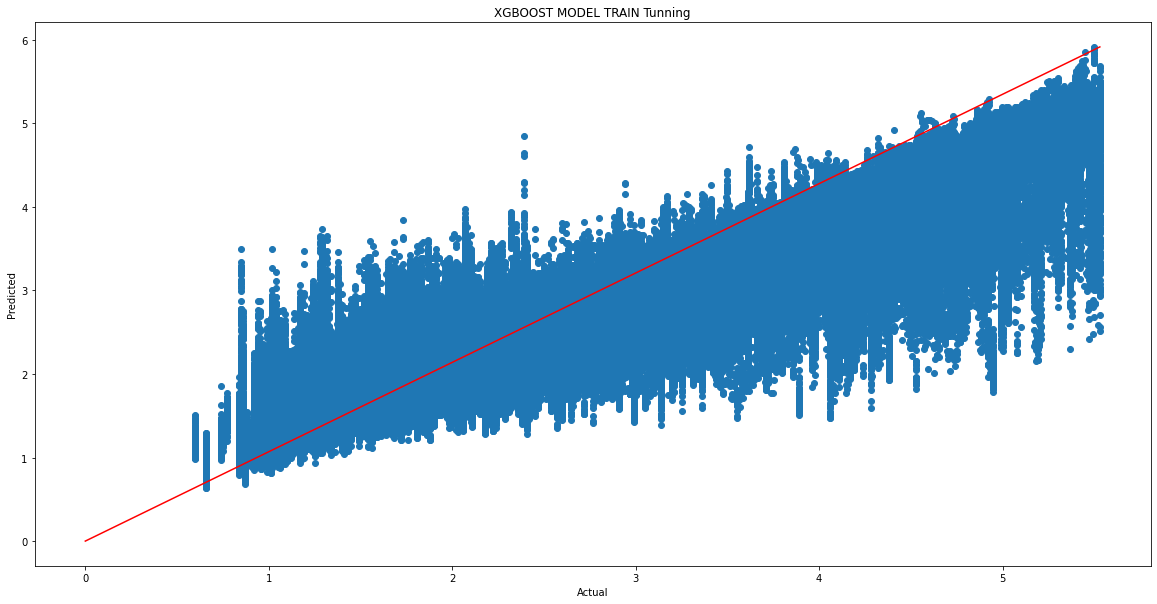

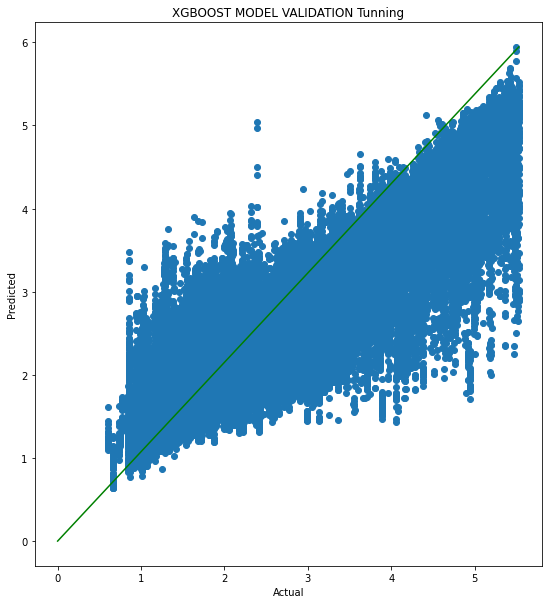

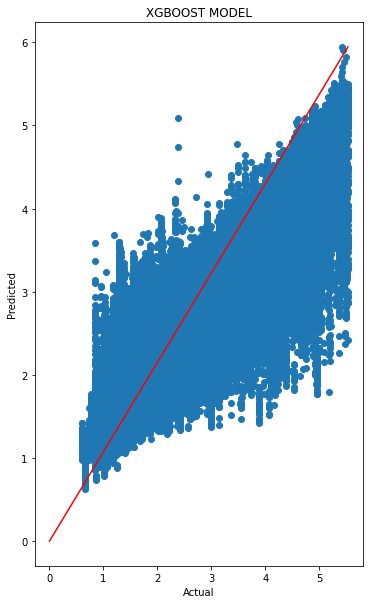

In [0]:
#https://www.kaggle.com/farrasalyafi/the-flotation
#https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process
#https://www.datasciencecentral.com/profiles/blogs/regression-analysis-how-do-i-interpret-r-squared-and-assess-the
#https://www.kaggle.com/danofer/get-minig-data-process
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="XGBOOST MODEL TRAIN Tunning", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_train, y_pred_train)
ax.plot([0,max(y_train)], [0,max(y_pred_train)], color='r')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
ax.set(title="XGBOOST MODEL VALIDATION Tunning", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, y_pred)
ax.plot([0,max(y_cv)], [0,max(y_pred)], color='g')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(131)
ax.set(title="XGBOOST MODEL", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_test, y_pred_test)
ax.plot([0,max(y_test)], [0,max(y_pred_test)], color='r')
fig.show()

#**REPORT**

In [0]:
#https://pypi.org/project/PrettyTable/-- for representation of data 
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists-- to add the rows in table 
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model R2 "
ptable.field_names = ['train','cv','test']
ptable.add_row([0.8237317967008811,0.8075437262359364,0.8062174527677453])
print("********************R2 MODEL*********************")
print(ptable)
ptable1 = PrettyTable()
ptable1.title = " Model MSE "
ptable1.field_names = ['train','cv','test']
ptable1.add_row([mse_train,mse_cv,mse_test])
print("*********************MSE MODEL**********************")
print(ptable1)

********************R2 MODEL*********************
+--------------------+--------------------+--------------------+
|       train        |         cv         |        test        |
+--------------------+--------------------+--------------------+
| 0.8237317967008811 | 0.8075437262359364 | 0.8062174527677453 |
+--------------------+--------------------+--------------------+
*********************MSE MODEL**********************
+---------------------+---------------------+---------------------+
|        train        |          cv         |         test        |
+---------------------+---------------------+---------------------+
| 0.22364155624983353 | 0.24326575901821534 | 0.24476967132948285 |
+---------------------+---------------------+---------------------+


#**METRIC COMPARSION**

1. R2 SCORE WITH IRON CONCENTRATE IS BETTER THAN MODEL WITHOUT IRON CONCENTRATE. THE MSE VALUES ARE ALSO BETTER THAN MODEL WITHOUT IRON CONCENTRATE.
PREDICTING SILICA WITHOUT IRON DOES NOT GIVE BETTER RESULTS. WITH THE DOMAIN KNOWLEDGE , THE ONLY WAY TO PREDICT SILICA CONCENTRATE IS TO LAG THE PREDICTION OF IRON CONCENTRATE WHILE DOING EXPERIMENTS PREDICT THE SILICA AFTERWARDS. 

2. WHEN WE COMPARE DECISION AND RANDOMFOREST , DECISION TREE IS STILL DOING BETTER PERFORMANCE THANT XGBOOST

**DT>RF>XGB**

#**PLOTS COMPARISION**


THE EVALUATION METRIC TELLS QUANTITAVELY WHILE THE PLOTS TELLS GRAPHICALLY 
IT IS VERY CLEAR THAT FROM BOTH THE GRAPHS HOW THE IRON CONCENTRATE PLAYS IMPORTANT ROLE IN THE PREDICTION.

**TRAIN CURVE::**

 THE POINTS ARE FALLING SIMILAR TO THE TRAIN CURVE IN WITH IRON CONCENTRATE WITH SLIGHT DIFFERENCE.

**TESTAND VALIDATION CURVE**

THE POINTS ARE TOTALLY OUT OF LINE AND THIS TELLS THAT IRON CONCENTRATE PLAYS A MAJOR ROLE IN PREDICTING THE OUTPUT DURING THE TEST TIME.

WHEN WE COMPARE DECISION TREE, THOUGH DT IS BETTER WITH R2 SCORE BUT XGBBOST  IS BETTER WHEN WE COMAPRE THE TEST AND VALIDATION CURVE.

#**INFERENCES**

PREDICTING SILICA WITHOUT IRON DOES NOT GIVE BETTER RESULTS. WITH THE DOMAIN KNOWLEDGE , THE ONLY WAY TO PREDICT SILICA CONCENTRATE IS TO LAG THE PREDICTION OF IRON CONCENTRATE WHILE DOING EXPERIMENTS PREDICT THE SILICA AFTERWARDS. 

ACCORDING TO DOMAIN KNOWLEDGE, BOTH IRON AND SILICA CONCENTRATE ARE TAKEN AS TARGET VARIBALES AND USING MULTI-TARGET REGRESSION THEY ARE PREDICTED .
https://ieeexplore.ieee.org/abstract/document/8907120

#**RIDGE REGRESSION**

In [0]:
from sklearn.linear_model import Ridge
alpha = [10 ** x for x in range(-5, 4)]
loss_array=[]

for i in alpha:
    model = Ridge(alpha = i, random_state=0)
    model.fit(features_train,y_train)
    predict_y = model.predict(features_cv)

    loss_array.append(mean_squared_error(y_cv, predict_y))

for i in range(len(loss_array)):
 print ('loss for alpha = ',alpha[i],'is',loss_array[i])

loss for alpha =  1e-05 is 1.0690773049738236
loss for alpha =  0.0001 is 1.0690773049718407
loss for alpha =  0.001 is 1.0690773049520133
loss for alpha =  0.01 is 1.0690773047537423
loss for alpha =  0.1 is 1.0690773027710734
loss for alpha =  1 is 1.0690772829485258
loss for alpha =  10 is 1.0690770851371265
loss for alpha =  100 is 1.069075148269827
loss for alpha =  1000 is 1.0690597533629427


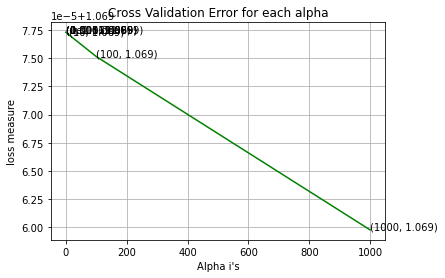

In [0]:
#code snippet taken from microsoft malware detection case study notebook-- to get the idea to get the graphs
#https://classroom.appliedcourse.com/classrooms/jEARG7xb/assignments/q2AJp9B5/users/jEARG7xb
best_alpha = np.argmin(loss_array)

fig, ax = plt.subplots()
ax.plot(alpha, loss_array,c='g')
for i, txt in enumerate(np.round(loss_array,3)):
 ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],loss_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("loss measure")
plt.show()


In [0]:
best_alpha=1000

In [0]:
model = Ridge(alpha =1000, random_state=0)
model.fit(features_train,y_train)
predict_y = model.predict(features_cv)
y_pred_train=model.predict(features_train)
y_pred_test=model.predict(features_test)

#**EVALUATION METRIC**

In [0]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_cv=mean_squared_error(y_cv,predict_y)
mse_test=mean_squared_error(y_test,y_pred_test)
r2_train=r2_score(y_train,y_pred_train)
r2_cv=r2_score(y_cv,predict_y)
r2_test=r2_score(y_test,y_pred_test)

#**REPORT**

In [0]:
#https://pypi.org/project/PrettyTable/-- for representation of data 
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists-- to add the rows in table 
from prettytable import PrettyTable
ptable = PrettyTable()
ptable.title = " Model R2 "
ptable.field_names = ['train','cv','test']
ptable.add_row([r2_train,r2_cv,r2_test])
print("********************R2 MODEL*********************")
print(ptable)
ptable1 = PrettyTable()
ptable1.title = " Model MSE "
ptable1.field_names = ['train','cv','test']
ptable1.add_row([mse_train,mse_cv,mse_test])
print("*********************MSE MODEL**********************")
print(ptable1)

********************R2 MODEL*********************
+---------------------+---------------------+---------------------+
|        train        |          cv         |         test        |
+---------------------+---------------------+---------------------+
| 0.15249283591693252 | 0.15422845618007952 | 0.15304179428151088 |
+---------------------+---------------------+---------------------+
*********************MSE MODEL**********************
+--------------------+--------------------+--------------------+
|       train        |         cv         |        test        |
+--------------------+--------------------+--------------------+
| 1.0752808365941273 | 1.0690597533629427 | 1.0698057415617288 |
+--------------------+--------------------+--------------------+


#**PLOTS**

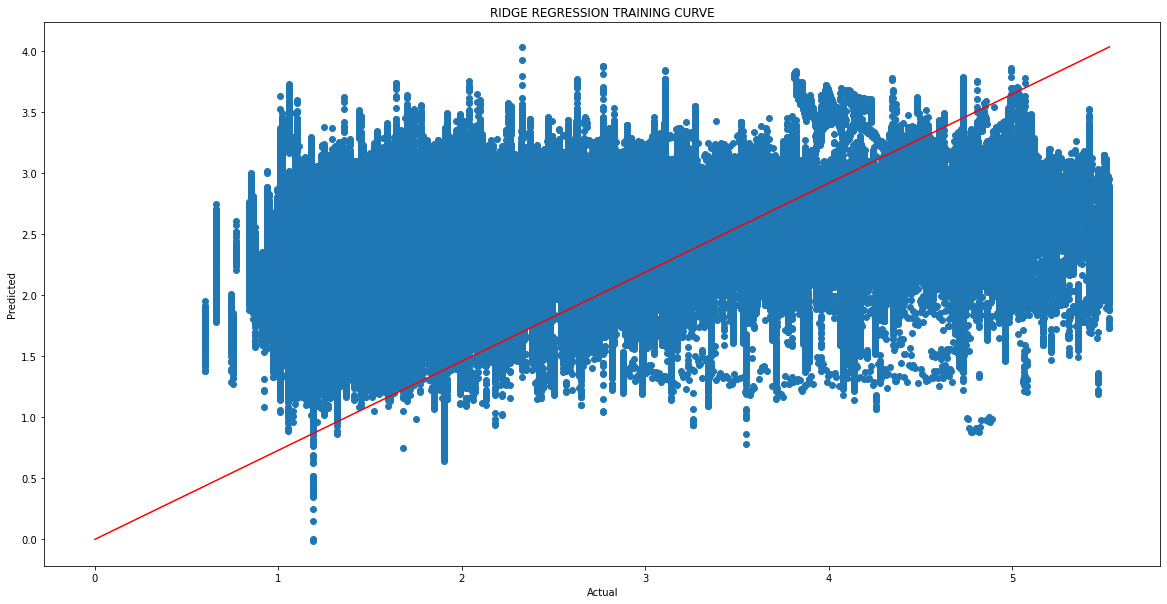

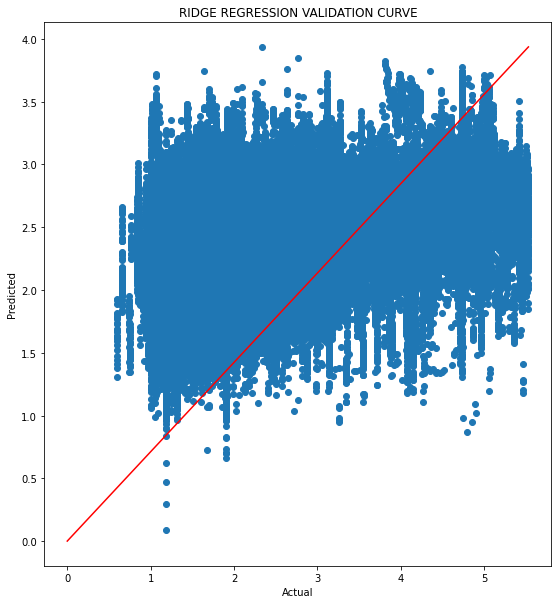

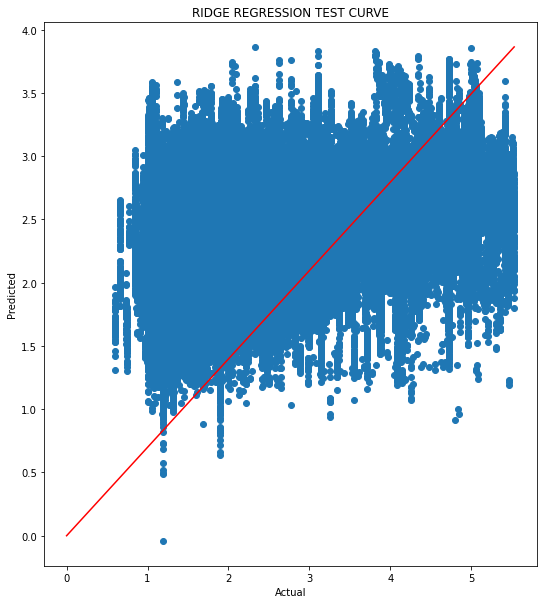

In [0]:
#https://www.kaggle.com/farrasalyafi/the-flotation
#https://www.kaggle.com/edumagalhaes/quality-prediction-in-a-mining-process
#https://www.datasciencecentral.com/profiles/blogs/regression-analysis-how-do-i-interpret-r-squared-and-assess-the
#https://www.kaggle.com/danofer/get-minig-data-process
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="RIDGE REGRESSION TRAINING CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_train, y_pred_train)
ax.plot([0,max(y_train)], [0,max(y_pred_train)], color='r')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
ax.set(title="RIDGE REGRESSION VALIDATION CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, predict_y)
ax.plot([0,max(y_cv)], [0,max(predict_y)], color='r')
fig.show()
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.set(title="RIDGE REGRESSION TEST CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_test, y_pred_test)
ax.plot([0,max(y_test)], [0,max(y_pred_test)], color='r')
fig.show()

#**METRIC COMPARSION**

1. R2 SCORE WITH IRON CONCENTRATE IS BETTER THAN MODEL WITHOUT IRON CONCENTRATE. THE MSE VALUES ARE ALSO BETTER THAN MODEL WITHOUT IRON CONCENTRATE.
PREDICTING SILICA WITHOUT IRON DOES NOT GIVE BETTER RESULTS. WITH THE DOMAIN KNOWLEDGE , THE ONLY WAY TO PREDICT SILICA CONCENTRATE IS TO LAG THE PREDICTION OF IRON CONCENTRATE WHILE DOING EXPERIMENTS PREDICT THE SILICA AFTERWARDS. 

2. WHEN WE COMPARE DECISION AND RANDOMFOREST , DECISION TREE IS STILL DOING BETTER PERFORMANCE THAN RIDGE

**DT>RF>XGB>RIDGE**

#**PLOTS COMPARISION**

THE EVALUATION METRIC TELLS QUANTITAVELY WHILE THE PLOTS TELLS GRAPHICALLY IT IS VERY CLEAR THAT FROM BOTH THE GRAPHS HOW THE IRON CONCENTRATE PLAYS IMPORTANT ROLE IN THE PREDICTION.

TRAIN CURVE::

THE POINTS ARE FALLING SIMILAR TO THE TRAIN CURVE IN WITH IRON CONCENTRATE WITH SLIGHT DIFFERENCE.

TESTAND VALIDATION CURVE

THE POINTS ARE TOTALLY OUT OF LINE AND THIS TELLS THAT IRON CONCENTRATE PLAYS A MAJOR ROLE IN PREDICTING THE OUTPUT DURING THE TEST TIME.

WHEN WE COMPARE DECISION TREE, THOUGH DT IS BETTER WITH R2 SCORE BUT XGBBOST IS BETTER WHEN WE COMAPRE THE TEST AND VALIDATION CURVE.



#**INFERENCES**

PREDICTING SILICA WITHOUT IRON DOES NOT GIVE BETTER RESULTS. WITH THE DOMAIN KNOWLEDGE , THE ONLY WAY TO PREDICT SILICA CONCENTRATE IS TO LAG THE PREDICTION OF IRON CONCENTRATE WHILE DOING EXPERIMENTS PREDICT THE SILICA AFTERWARDS.

ACCORDING TO DOMAIN KNOWLEDGE, BOTH IRON AND SILICA CONCENTRATE ARE TAKEN AS TARGET VARIBALES AND USING MULTI-TARGET REGRESSION THEY ARE PREDICTED . https://ieeexplore.ieee.org/abstract/document/8907120

#**OVERALL COMPARSION**

In [0]:
from prettytable import PrettyTable
x = PrettyTable(border=True, header=True, padding_width=15)
x.field_names = ["MODEL1", "R2_TRAIN","R2_CV","R2_TEST","MSE_TRAIN","MSE_CV","MSE_TEST"]
x.add_row(["RIDGE WITHOUT IRON CONCENTRATE",0.1524,0.154,0.1530,1.0752,1.0690,1.0698])
x.add_row(["RIDGE",0.693,0.678,0.680,0.406,0.406,0.403])

x.add_row(["XGBOOST  WITHOUT IRON CONCENTRATE",0.823,0.807,0.806,0.223,0.243,0.244])
x.add_row(["XGBOOST",0.9795,0.9773,0.9775,0.025,0.028,0.030])
x.add_row(["DECISION TREE WITHOUT IRON CONCENTRATE",0.9967,0.882,0.881,0.004,0.126,0.133])
x.add_row(["DECISION TREE ",0.9998,0.9993,0.9928,0.0001,0.008,0.009])
x.add_row(["RANDOMFOREST WITHOUT IRON CONCENTRATE",0.9420,0.882,0.881,0.0734,0.148,0.1502])
x.add_row(["RANDOMFOREST ",0.9914,0.9822,0.9822,0.010,0.022,0.022])


print(x)

+--------------------------------------------------------------------+--------------------------------------+------------------------------------+-------------------------------------+---------------------------------------+------------------------------------+--------------------------------------+
|                               MODEL1                               |               R2_TRAIN               |               R2_CV                |               R2_TEST               |               MSE_TRAIN               |               MSE_CV               |               MSE_TEST               |
+--------------------------------------------------------------------+--------------------------------------+------------------------------------+-------------------------------------+---------------------------------------+------------------------------------+--------------------------------------+
|                   RIDGE WITHOUT IRON CONCENTRATE                   |                0.1524     

#**SUMMARY**


1. THE IRON CONCENTRATE IS IMPORTANT TO PREDICT THE SILICA CONCENTRATE.
https://www.scielo.br/scielo.php?script=sci_arttext&pid=S2448-167X2018000200299

2. IRON CONCENTRATE AND SILICA VCONCENTRATE ARE HIGHLY CORRELATED.

3. DECISION TREE HAS BETTER PERFORMANCE.

4. TIME CONSUMPTION FOR TUNING HYPERPARAMTER OF RF, XGBOOST IS HIGHER.

5. RIDGE MODEL IS NOT ADVISBLE TO USE IN REAL-TIME










#**ALTERNATIVE APPROACH**

1. https://ieeexplore.ieee.org/abstract/document/8907120

INSTEAD OF PRECITING ONE TRAGET VARIBALES, SINCE , IRON AND SILICA ARE BOTH ARE HIGHLY DEPENDENT WE CAN USE BOTH CONCENTRATE AS TWO TARGET VARIBALES

#**MULTI-TARGET REGRESSION**

##**INTRODUCTION**

When multiple dependent variables exist in a
regression model, this task is called as multi-target regression.
In this case, a multi-output regressor is employed to learn the
mapping from input features to output variables jointly. In this
study, multi-target regression technique is implemented for
quality prediction in a mining process to estimate the amount
of silica and iron concentrates in the ore at the end of the
process.

In this study, two inter-dependent single target regression
tasks are transformed into a multiple output regression
problem for quality prediction in a mining process. 

In the pervious models have been conducted to
estimate silica concentrate with or without taking iron
concentrate as input parameter. In this aspect, the problem is
a single-target regression problem. However, this  study that focuses on the
estimation of both iron and silica concentrates
simultaneously as output variables. We compared different
multi-target regressors that use Random Forest, AdaBoost, XGBOOST ,RIDGE and Decision Tree algorithms separately in the background. Coefficient of determination (R2) metric and MSE was used to evaluate predictive performance of the regression methods for the mentioned data.

##**METHODS TO IMPLEMENT MTR**
**Problem transformation methods**

1. These methods are mainly based on transforming the multi-output regression problem into single-target problems, then building a model for each target, and finally
concatenating all the d predictions. The main drawback of these methods is that the
relationships among the targets are ignored, and the targets are predicted independently, which may affect the overall quality of the predictions.

2. **Regressor chains (RC) method**

   It is inspired by the recent multi-label chain classifiers 31. RC is another problem transformation method, based on the idea of chaining
single-target models. The training of RC consists of selecting a random chain (i.e.,
permutation) of the set of target variables, then building a separate regression model
for each target following the order of the selected chain.

3. **Single traget model**
  
  output variables are estimated
independently and potential relations between them cannot
be exploited

##**RELATED WORKS**

https://ieeexplore.ieee.org/abstract/document/8907120Y

The paper focus on inherent multiregressor models and concluded to it is best to predict silica and iron concentrate at the same time.  

##**NEW METHODS**
https://machinelearningmastery.com/multi-output-regression-models-with-python/


My work focus on following implementation:

1. To see whether the %silica concentrate can be predicted without iron concentrate and result showed us it is not good to predict silica concentrate withou iron concentrate . Hence, to solve the problem we can implement the multitarget regression method to predict both target variables at same time.

2. To try differnt models which is not inherent multitarget regression models like Randomforest,Ridge,Xgboost

3. To finalize the best model with R2 as well as MSE metric.

# **RIDGE REGRESSOR**

##**DATA MODELING**

In [0]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge


In [0]:
#code snippet taken from microsoft malware detection case study notebook-- to get the idea to get the graphs
#https://classroom.appliedcourse.com/classrooms/jEARG7xb/assignments/q2AJp9B5/users/jEARG7xb
df=pd.read_csv('/content/drive/My Drive/preprocessed_time')
y = df.iloc[:,23:25]
X = df.drop(['% Silica Concentrate','% Iron Concentrate','index','datetime hours'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,test_size=0.20,random_state=30)

scale_features_std = StandardScaler()
features_train = scale_features_std.fit_transform(X_train)
features_test = scale_features_std.transform(X_test)

features_cv = scale_features_std.transform(X_cv)

print(X_train.shape,features_train.shape,X_test.shape,features_test.shape,features_cv.shape,y_train.shape,y_cv.shape,y_test.shape)

(471969, 21) (471969, 21) (147491, 21) (147491, 21) (117993, 21) (471969, 2) (117993, 2) (147491, 2)


##**USING SKLEARN MULTIOUTPUT REGRESSOR METHOD**

In [0]:
#https://machinelearningmastery.com/multi-output-regression-models-with-python/
#https://stackoverflow.com/questions/50132322/how-does-multiple-target-ridge-regression-work-in-scikit-learn

from sklearn.multioutput import MultiOutputRegressor

In [0]:
model = MultiOutputRegressor(Ridge(alpha=1000,random_state=0))
model.fit(features_train, y_train)


MultiOutputRegressor(estimator=Ridge(alpha=1000, copy_X=True,
                                     fit_intercept=True, max_iter=None,
                                     normalize=False, random_state=0,
                                     solver='auto', tol=0.001),
                     n_jobs=None)

##**PREDICTION**

In [0]:
y_pred=model.predict(features_cv)
y_pred_train=model.predict(features_train)
y_pred_test=model.predict(features_test)

##**EVALUATION METRIC**

In [0]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_cv=mean_squared_error(y_cv,y_pred)
mse_test=mean_squared_error(y_test,y_pred_test)

In [0]:
r2_train=r2_score(y_train,y_pred_train)
r2_cv=r2_score(y_cv,y_pred)
r2_test=r2_score(y_test,y_pred_test)

In [0]:
r2_train,r2_cv,r2_test,mse_cv,mse_test,mse_train,mse_cv

(0.1457070772811201,
 0.14798745903277455,
 0.1466686774031905,
 1.0722436207597437,
 1.0729684678403668,
 1.076168464619778,
 1.0722436207597437)

##**PLOTS UDING MTR METHOD**

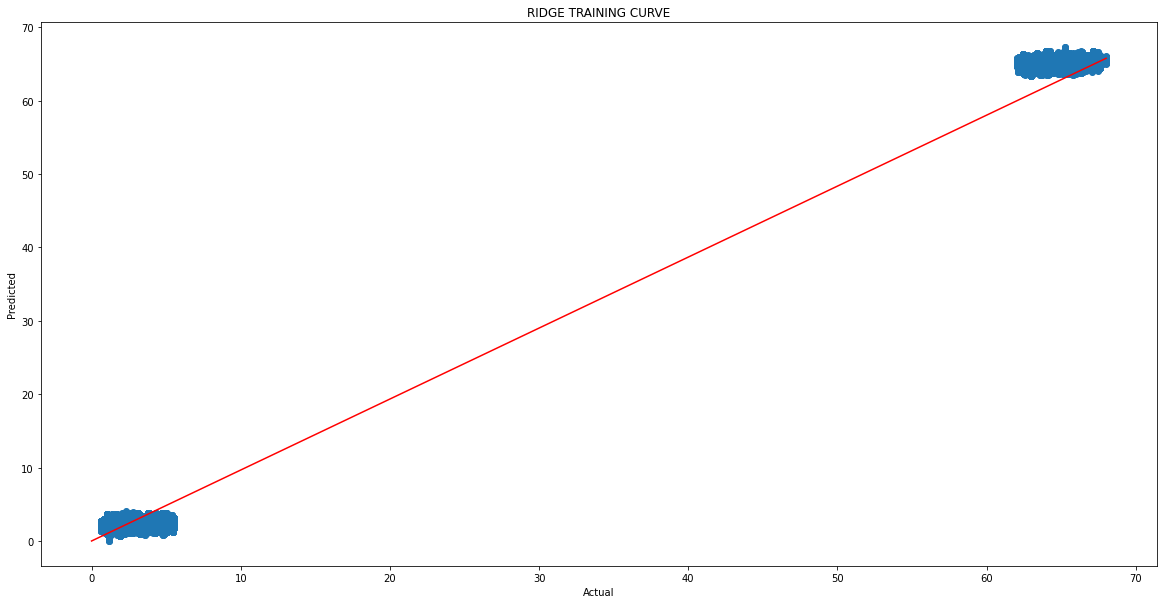

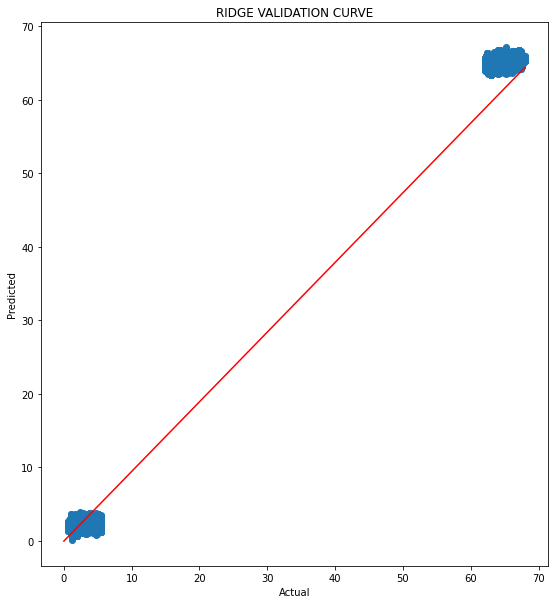

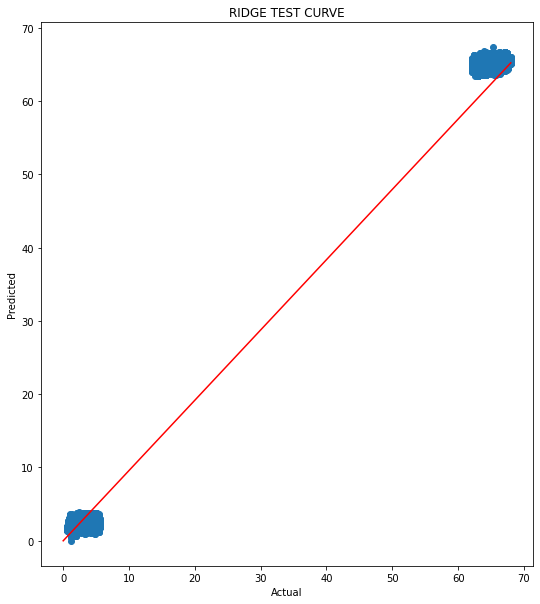

In [0]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="RIDGE TRAINING CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_train, y_pred_train)
ax.plot([0,max(y_train['% Iron Concentrate'])], [0,max(y_pred_train[0])], color='r')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
ax.set(title="RIDGE VALIDATION CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, y_pred)
ax.plot([0,max(y_cv['% Iron Concentrate'])], [0,max(y_pred[0])], color='r')
fig.show()
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.set(title="RIDGE TEST CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_test, y_pred_test)
ax.plot([0,max(y_test['% Iron Concentrate'])], [0,max(y_pred_test[0])], color='r')
fig.show()

##**USING REGRESSION CHAIN METHOD**

In [0]:
from sklearn.multioutput import RegressorChain

In [0]:
model = Ridge(alpha =1000, random_state=123)
wrapper1 = RegressorChain(model,cv=5)
wrapper1.fit(features_train,y_train)

RegressorChain(base_estimator=Ridge(alpha=1000, copy_X=True, fit_intercept=True,
                                    max_iter=None, normalize=False,
                                    random_state=123, solver='auto',
                                    tol=0.001),
               cv=5, order=None, random_state=None)

##**PREDICTION**

In [0]:
y_pred_cv=wrapper1.predict(features_cv)
y_pred_train=wrapper1.predict(features_train)
y_pred_test=wrapper1.predict(features_test)

##**EVALUATION METRIC**

In [0]:
r2_cv=r2_score(y_pred_cv,y_cv)
r2_train=r2_score(y_pred_train,y_train)
r2_test=r2_score(y_pred_test,y_test)

In [0]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_cv=mean_squared_error(y_cv,y_pred)
mse_test=mean_squared_error(y_test,y_pred_test)

In [0]:
r2_train,r2_cv,r2_test,mse_train,mse_cv,mse_test

(0.1457070772811201,
 0.14798745903277455,
 0.1466686774031905,
 1.0761683118743428,
 1.0722436207597437,
 1.0729682609689142)

##**PLOTS**

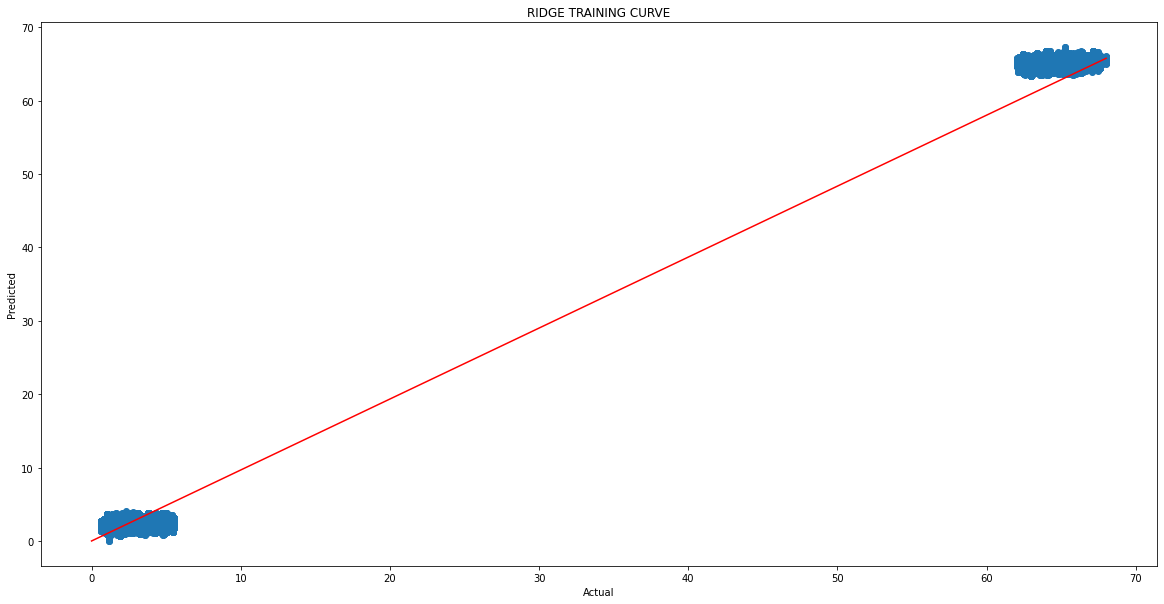

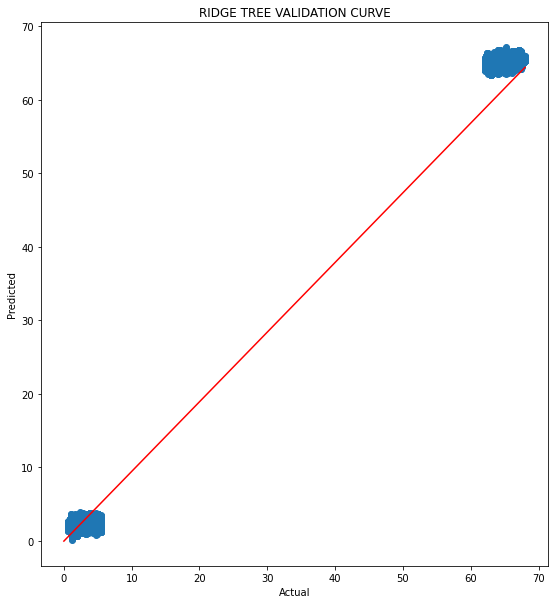

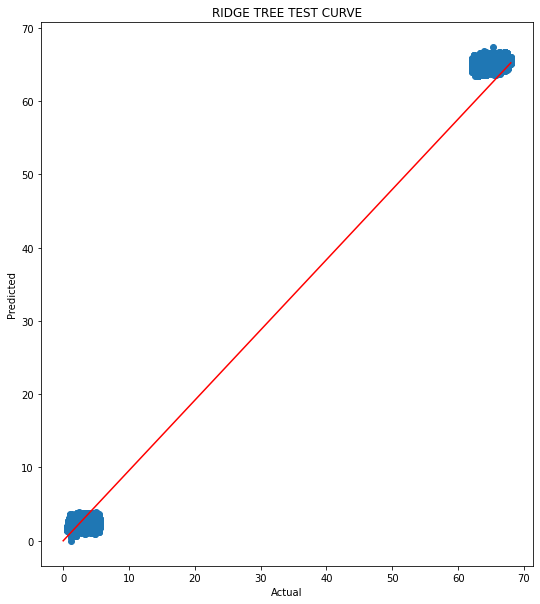

In [0]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="RIDGE TRAINING CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_train, y_pred_train)
ax.plot([0,max(y_train['% Iron Concentrate'])], [0,max(y_pred_train[0])], color='r')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
ax.set(title="RIDGE TREE VALIDATION CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, y_pred_cv)
ax.plot([0,max(y_cv['% Iron Concentrate'])], [0,max(y_pred[0])], color='r')
fig.show()
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.set(title="RIDGE TREE TEST CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_test, y_pred_test)
ax.plot([0,max(y_test['% Iron Concentrate'])], [0,max(y_pred_test[0])], color='r')

fig.show()

#**SINGLE TARGET REGRESSSION METHOD(NAIVE METHOD)**

##**MODEL TO PREDICT IRON CONCENTRATE**

In [0]:
y = df['% Iron Concentrate']
X = df.drop(['% Iron Concentrate','index','datetime hours'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

X_train, X_cv, y_train, y_cv1 = train_test_split(X_train, y_train,test_size=0.20,random_state=30)

from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler()
features_train = scale_features_std.fit_transform(X_train)
features_test = scale_features_std.transform(X_test)

features_cv = scale_features_std.transform(X_cv)

print(X_train.shape,features_train.shape,X_test.shape,features_test.shape,features_cv.shape,y_train.shape)

model=Ridge(alpha =1000, random_state=0)
model.fit(features_train,y_train)

y_pred_train_iron=model.predict(features_train)
y_pred_cv_iron=model.predict(features_cv)
y_pred_test_iron=model.predict(features_test)

r2_cv_iron=r2_score(y_pred_cv_iron,y_cv1)
r2_train_iron=r2_score(y_pred_train_iron,y_train)
r2_test_iron=r2_score(y_pred_test_iron,y_test)

mse_train_iron=mean_squared_error(y_train,y_pred_train_iron)
mse_test_iron=mean_squared_error(y_test,y_pred_test_iron)
mse_cv_iron=mean_squared_error(y_cv1,y_pred_cv_iron)

r2_train_iron,r2_cv_iron,r2_test_iron,mse_train_iron,mse_cv_iron,mse_test_iron




(471969, 22) (471969, 22) (147491, 22) (147491, 22) (117993, 22) (471969,)


(0.514535485002991,
 0.5123168325856021,
 0.5157302218318192,
 0.40752759926814774,
 0.4091846624430369,
 0.40599913412920674)

##**MODEL TO PREDICT SILICA CONCENTRATE**

In [0]:
y = df['% Silica Concentrate']
X = df.drop(['% Silica Concentrate','index','datetime hours'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

X_train, X_cv, y_train, y_cv2 = train_test_split(X_train, y_train,test_size=0.20,random_state=30)

from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler()
features_train = scale_features_std.fit_transform(X_train)
features_test = scale_features_std.transform(X_test)

features_cv = scale_features_std.transform(X_cv)

print(X_train.shape,features_train.shape,X_test.shape,features_test.shape,features_cv.shape,y_train.shape)


model.fit(features_train,y_train)

y_pred_train_silica=model.predict(features_train)
y_pred_cv_silica=model.predict(features_cv)
y_pred_test_silica=model.predict(features_test)


r2_cv_silica=r2_score(y_pred_cv_silica,y_cv2)
r2_train_silica=r2_score(y_pred_train_silica,y_train)
r2_test_silica=r2_score(y_pred_test_silica,y_test)

mse_train_silica=mean_squared_error(y_train,y_pred_train_silica)
mse_test_silica=mean_squared_error(y_test,y_pred_test_silica)
mse_cv_silica=mean_squared_error(y_cv2,y_pred_cv_silica)

r2_train_silica,r2_cv_silica,r2_test_silica,mse_train_silica,mse_cv_silica,mse_test_silica


(471969, 22) (471969, 22) (147491, 22) (147491, 22) (117993, 22) (471969,)


(0.5259529825712774,
 0.526453891816218,
 0.5288178307374647,
 0.4068563070630419,
 0.4067576473714793,
 0.4035943750209711)

##**CONCATENATION OF TWO PREDICTIONS**

In [0]:
import numpy as np

y_pred_train_iron=y_pred_train_iron.reshape(-1,1)
y_pred_cv_iron=y_pred_cv_iron.reshape(-1,1)
y_pred_test_iron=y_pred_test_iron.reshape(-1,1)
y_pred_train_silica=y_pred_train_silica.reshape(-1,1)
y_pred_cv_silica=y_pred_cv_silica.reshape(-1,1)
y_pred_test_silica=y_pred_test_silica.reshape(-1,1)


y_pred_train=np.concatenate((y_pred_train_iron,y_pred_train_silica),axis=1)
y_pred_cv=np.concatenate((y_pred_cv_iron,y_pred_cv_silica),axis=1)
y_pred_test=np.concatenate((y_pred_test_iron,y_pred_test_silica),axis=1)

r2_cv=r2_score(y_pred_cv,y_cv)
r2_train=r2_score(y_pred_train,y_train)
r2_test=r2_score(y_pred_test,y_test)

mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
mse_cv=mean_squared_error(y_cv,y_pred_cv)

r2_train,r2_cv,r2_test,mse_train,mse_cv,mse_test

(0.5202442337871346,
 0.5193853622009061,
 0.5222740262846326,
 0.4071919531656044,
 0.40797115490725677,
 0.4047967545750942)

##**PLOTS**

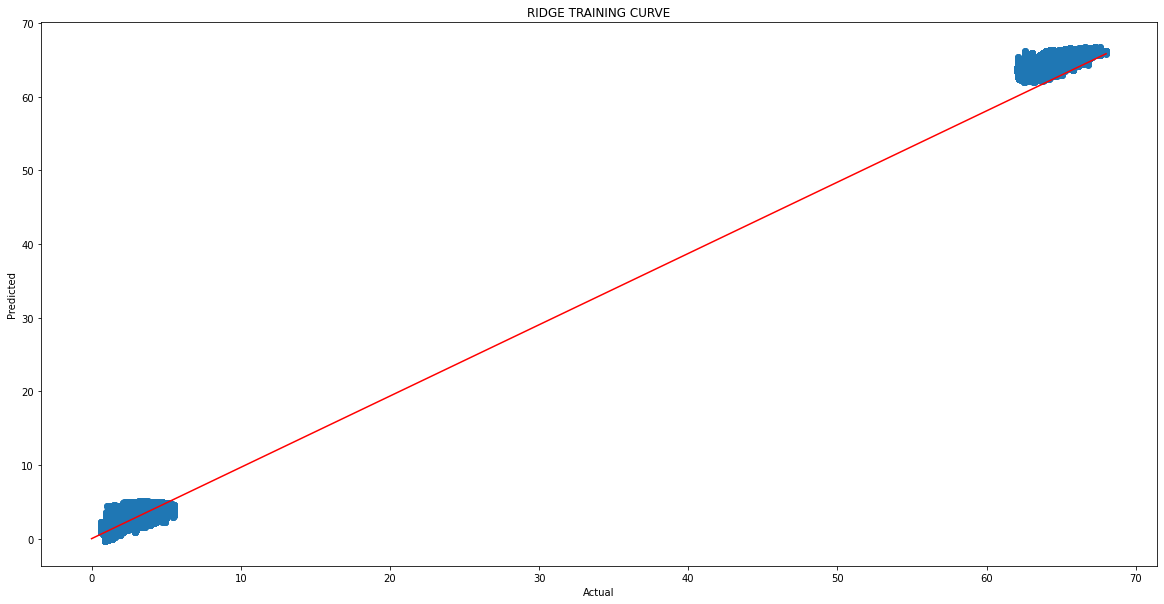

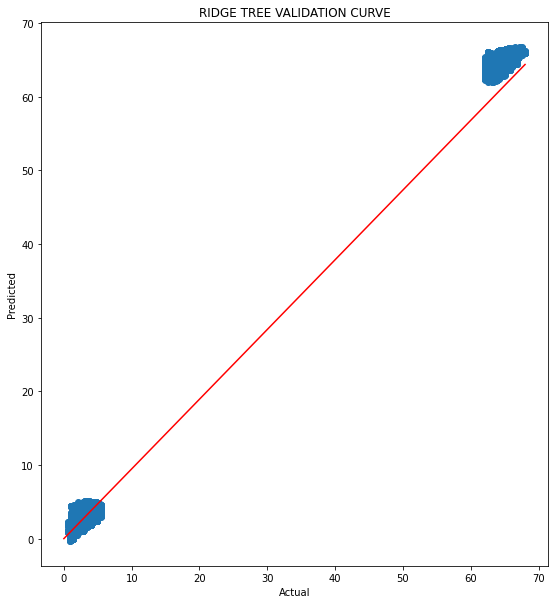

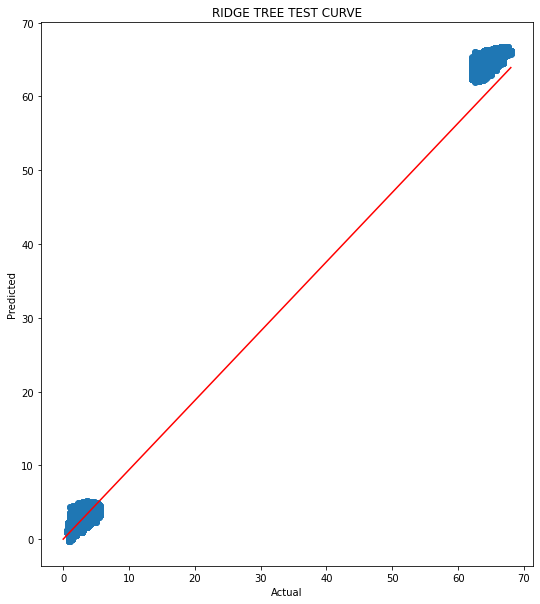

In [0]:



fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="RIDGE TRAINING CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_train, y_pred_train)
ax.plot([0,max(y_train['% Iron Concentrate'])], [0,max(y_pred_train[0])], color='r')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
ax.set(title="RIDGE TREE VALIDATION CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, y_pred_cv)
ax.plot([0,max(y_cv['% Iron Concentrate'])], [0,max(y_pred[0])], color='r')
fig.show()
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.set(title="RIDGE TREE TEST CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_test, y_pred_test)
ax.plot([0,max(y_test['% Iron Concentrate'])], [0,max(y_pred_test[0])], color='r')

fig.show()

##**REPORT**

In [0]:
#https://pypi.org/project/PrettyTable/-- for representation of data 
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists-- to add the rows in table 
from prettytable import PrettyTable
x = PrettyTable(border=True, header=True, padding_width=15)
x.field_names = ["MODEL1", "R2_TRAIN","R2_CV","R2_TEST","MSE_TRAIN","MSE_CV","MSE_TEST"]
x.add_row(["RIDGE MTR",0.1457070772811201,0.14798745903277455,
 0.1466686774031905,
 1.0761683118743428,
 1.0722436207597437,
 1.0729682609689142])
x.add_row(["RIDGE RIGRESSION CHAIN",0.1457070772811201,0.14798745903277455,
 0.1466686774031905,
 1.0761683118743428,
 1.0722436207597437,                                             
 1.0729682609689142])

x.add_row(["RIDGE(NAIVE METHOD)",0.5202442337871346,0.5193853622009061,
 0.5222740262846326,
 0.4071919531656044,
 0.40797115490725677,
 0.4047967545750942])
print(x)

+----------------------------------------------------+------------------------------------------------+-------------------------------------------------+------------------------------------------------+------------------------------------------------+-------------------------------------------------+------------------------------------------------+
|                       MODEL1                       |                    R2_TRAIN                    |                      R2_CV                      |                    R2_TEST                     |                   MSE_TRAIN                    |                      MSE_CV                     |                    MSE_TEST                    |
+----------------------------------------------------+------------------------------------------------+-------------------------------------------------+------------------------------------------------+------------------------------------------------+-----------------------------------------------

##**ANALYSIS BETWEEN THREE METHODS**

1. SINGLE TARGET MODEL:

   The main drawback of these methods is that the
relationships among the targets are ignored, and the targets are predicted independently, which may affect the overall quality of the predictions.

2. REGRESSOR CHAIN AND MTR :

   The methods tend to give same result when implemented on ridge regression.


##**PLOTS INFERENCES**

1. NAIVE METHOD
  
  It is simply not a perefect method for analysis and it has better result because it doent take into count of target dependencies.

2. Regressor chain and MTR

   In train curve, the points tend to overlay on the line and in both iron and silica the points are overfalling on regression line

   In test and validation curve, the models are able to predict iron concetrate and are not able to predict the silica as the samw way in iron.

##**METRIC ANALYSIS**


#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

**R2 SCORE**

Acoording to literature, the r2 score is good when it is closer to 1  and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

TRAIN R2 is  so closer to 0 and TEST r2 is also  to 0 and hence inorder to get better result , we must try other models 

**MSE VALUE**

A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.

The train,cv,test loss and r2 score is not very good.

##**CONCLUSION**

NAIVE METHOD  must not be used in prediction and neither MTR and Regression with ridge performance are not satisfactory . Hence, to predict two target variables at same time we need to not ridge.

#**XGBOOST**

##**DATA MODELING**

In [0]:

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import pandas as pd

df=pd.read_csv('/content/drive/My Drive/preprocessed_time')

y = df.iloc[:,23:25]
X = df.drop(['% Silica Concentrate','% Iron Concentrate','index','datetime hours'], axis=1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,test_size=0.20,random_state=30)

from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler()
features_train = scale_features_std.fit_transform(X_train)
features_test = scale_features_std.transform(X_test)

features_cv = scale_features_std.transform(X_cv)

print(X_train.shape,features_train.shape,X_test.shape,features_test.shape,features_cv.shape,y_train.shape,y_cv.shape,y_test.shape)

(471969, 21) (471969, 21) (147491, 21) (147491, 21) (117993, 21) (471969, 2) (117993, 2) (147491, 2)


## **MODEL USING MULTIOUTPUTREGRESSOR**

In [0]:
import xgboost as xgb
from sklearn.multioutput import MultiOutputRegressor


In [0]:
clf=xgb.XGBRegressor(max_depth=10 ,learning_rate=0.01,n_estimators=1000 ,verbose=2,subsample=0.1,colsample_bytree=1)

In [0]:
model=MultiOutputRegressor(clf)
model.fit(features_train,y_train)

[01:46:32] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[02:15:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


MultiOutputRegressor(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1, gamma=0,
                                            importance_type='gain',
                                            learning_rate=0.01,
                                            max_delta_step=0, max_depth=10,
                                            min_child_weight=1, missing=None,
                                            n_estimators=1000, n_jobs=1,
                                            nthread=None,
                                            objective='reg:linear',
                                            random_state=0, reg_alpha=0,
                                            reg_lambda=1, scale_pos_weight=1,
                                            seed=None, silent=None,
                

# **PREDICTION**

In [0]:
y_pred=model.predict(features_cv)
y_pred_train=model.predict(features_train)
y_pred_test=model.predict(features_test)

# **EVALUATION METRIC**

In [0]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_cv=mean_squared_error(y_cv,y_pred)
mse_test=mean_squared_error(y_test,y_pred_test)

In [0]:
r2_train=r2_score(y_train,y_pred_train)
r2_cv=r2_score(y_cv,y_pred)
r2_test=r2_score(y_test,y_pred_test)

In [0]:
r2_train,r2_cv,r2_test,mse_cv,mse_test,mse_train,mse_cv

(0.790067573655429,
 0.7760975535975633,
 0.7750269140015339,
 0.2816141156963654,
 0.2827106725163956,
 0.2641687929200151,
 0.2816141156963654)

# **PLOTS**

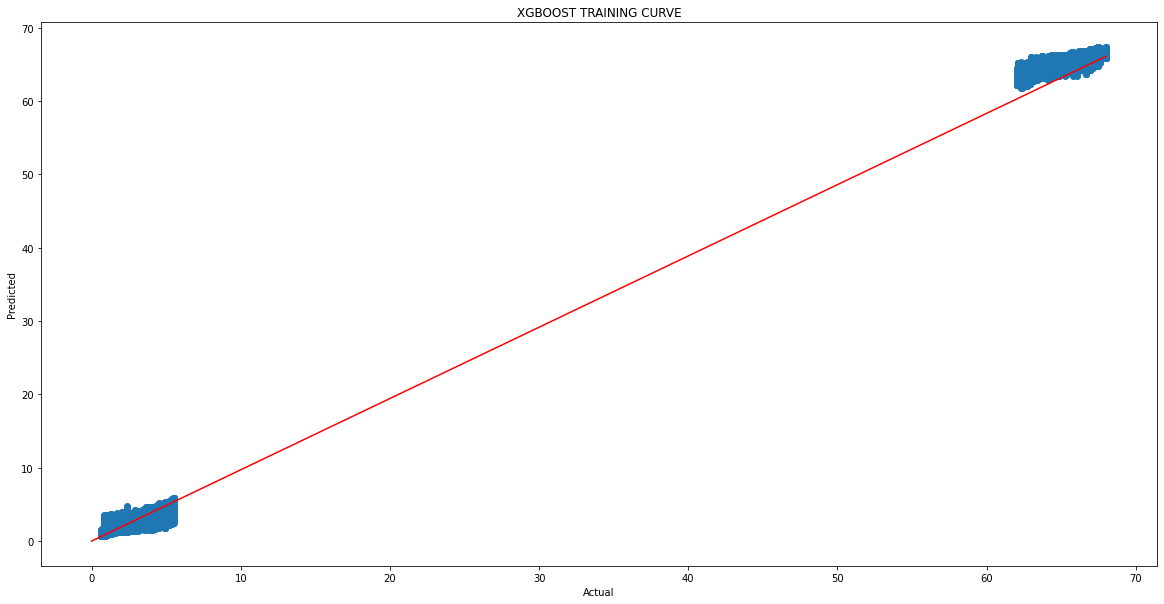

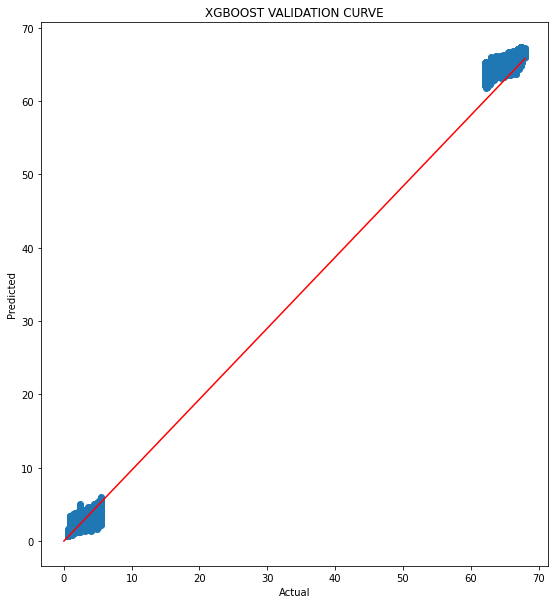

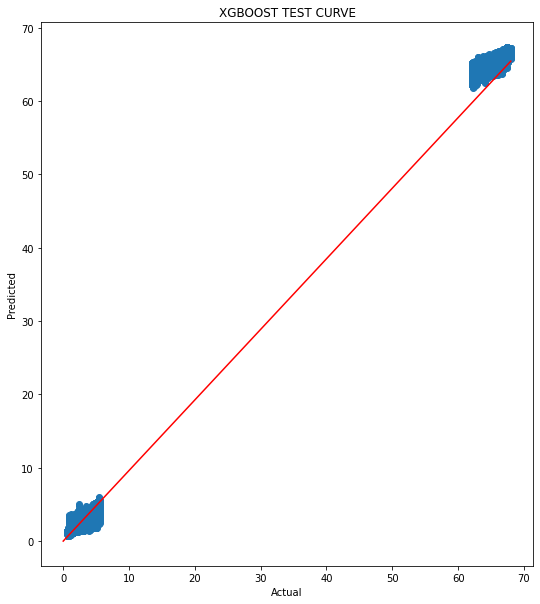

In [0]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="XGBOOST TRAINING CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_train, y_pred_train)
ax.plot([0,max(y_train['% Iron Concentrate'])], [0,max(y_pred_train[0])], color='r')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
ax.set(title="XGBOOST VALIDATION CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, y_pred)
ax.plot([0,max(y_cv['% Iron Concentrate'])], [0,max(y_pred[0])], color='r')
fig.show()
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.set(title="XGBOOST TEST CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_test, y_pred_test)
ax.plot([0,max(y_test['% Iron Concentrate'])], [0,max(y_pred_test[0])], color='r')
fig.show()

# **MODEL USING REGRESSOR CHAIN**

In [0]:
from sklearn.multioutput import RegressorChain

In [0]:
model=xgb.XGBRegressor(max_depth=10 ,learning_rate=0.01,n_estimators=1000 ,verbose=2,subsample=0.1,colsample_bytree=1)
wrapper1 = RegressorChain(model)
wrapper1.fit(features_train,y_train)

[05:39:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[06:09:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RegressorChain(base_estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           importance_type='gain',
                                           learning_rate=0.01, max_delta_step=0,
                                           max_depth=10, min_child_weight=1,
                                           missing=None, n_estimators=1000,
                                           n_jobs=1, nthread=None,
                                           objective='reg:linear',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None,
                                           subsample=0.1, verbose=2,
    

# **PREDICTION**

In [0]:
y_pred_cv=wrapper1.predict(features_cv)
y_pred_train=wrapper1.predict(features_train)
y_pred_test=wrapper1.predict(features_test)

# **EVALUATION METRIC**

In [0]:
r2_cv=r2_score(y_pred_cv,y_cv)
r2_train=r2_score(y_pred_train,y_train)
r2_test=r2_score(y_pred_test,y_test)

In [0]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_cv=mean_squared_error(y_cv,y_pred)
mse_test=mean_squared_error(y_test,y_pred_test)

In [0]:
r2_train,r2_cv,r2_test,mse_train,mse_cv,mse_test

(0.5341046012820809,
 0.5105948839081095,
 0.5101846872368989,
 0.3321947153953305,
 0.2816141156963654,
 0.3455795604174674)

# **PLOTS**

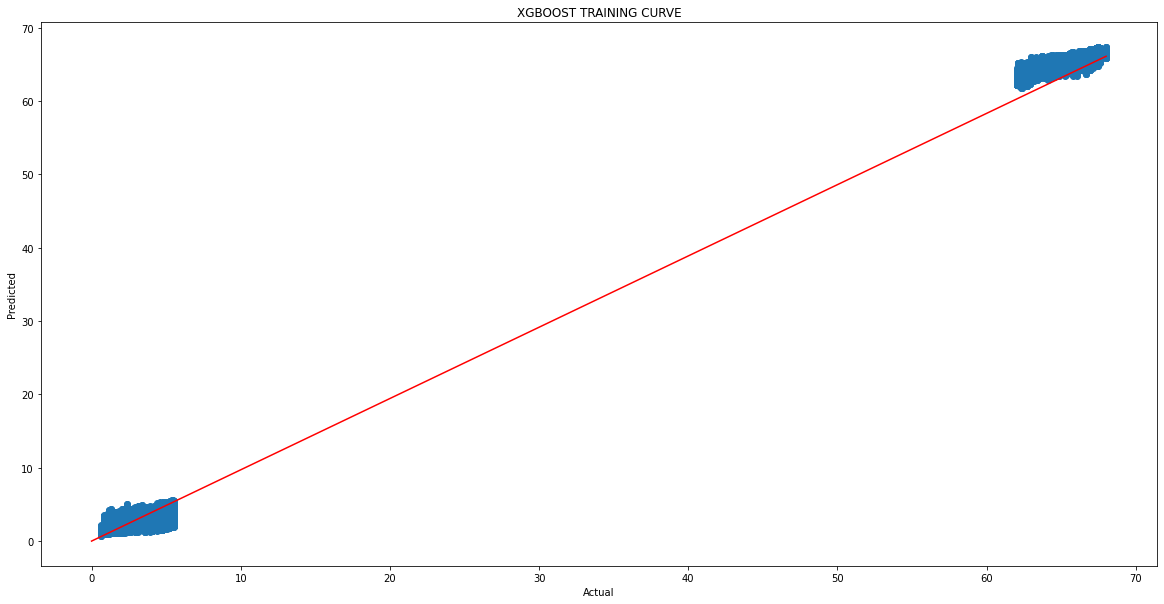

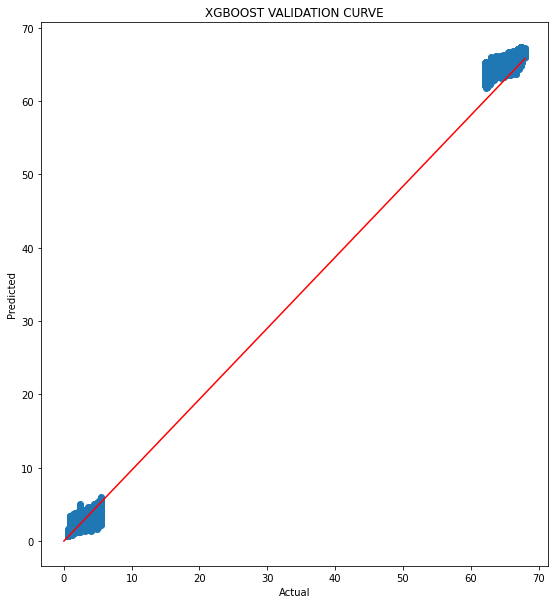

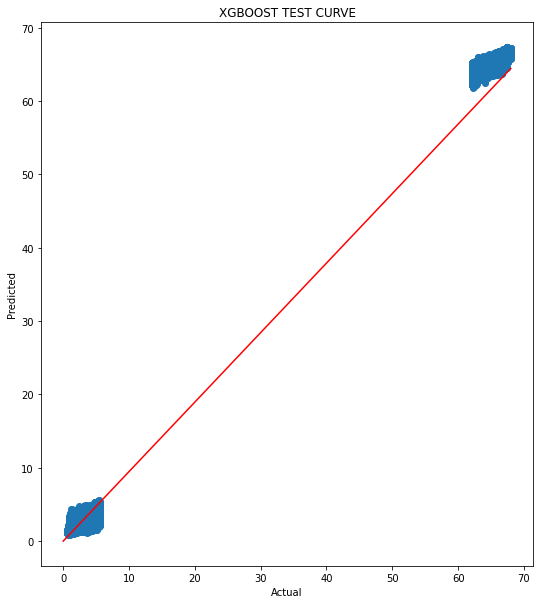

In [0]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="XGBOOST TRAINING CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_train, y_pred_train)
ax.plot([0,max(y_train['% Iron Concentrate'])], [0,max(y_pred_train[0])], color='r')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
ax.set(title="XGBOOST VALIDATION CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, y_pred)
ax.plot([0,max(y_cv['% Iron Concentrate'])], [0,max(y_pred[0])], color='r')
fig.show()
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.set(title="XGBOOST TEST CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_test, y_pred_test)
ax.plot([0,max(y_test['% Iron Concentrate'])], [0,max(y_pred_test[0])], color='r')
fig.show()

##**REPORT**

In [0]:
#https://pypi.org/project/PrettyTable/-- for representation of data 
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists-- to add the rows in table 
from prettytable import PrettyTable
x = PrettyTable(border=True, header=True, padding_width=15)
x.field_names = ["MODEL1", "R2_TRAIN","R2_CV","R2_TEST","MSE_TRAIN","MSE_CV","MSE_TEST"]
x.add_row(["XGBOOST MTR",0.790067573655429,
 0.7760975535975633,
 0.7750269140015339,
 0.2816141156963654,
 0.2827106725163956,
 0.2641687929200151,
 
])
x.add_row(["XGBOOST RIGRESSION CHAIN",0.5341046012820809,
 0.5105948839081095,
 0.5101846872368989,             
 0.3321947153953305,
 0.2816141156963654,
 0.3455795604174674])
print(x)

+------------------------------------------------------+------------------------------------------------+------------------------------------------------+------------------------------------------------+------------------------------------------------+------------------------------------------------+------------------------------------------------+
|                        MODEL1                        |                    R2_TRAIN                    |                     R2_CV                      |                    R2_TEST                     |                   MSE_TRAIN                    |                     MSE_CV                     |                    MSE_TEST                    |
+------------------------------------------------------+------------------------------------------------+------------------------------------------------+------------------------------------------------+------------------------------------------------+----------------------------------------------

## **ANALYSIS BETWEEN METHODS**

1.  MTR AND REGRESSION CHAIN
   
   The MTR has better performances than regression chain and the loss value is also low and plots are also better in MTR 

   

## **PLOTS ANALYSIS**

1.  MTR

   In train curve, the points tend to overlay on the line and in both iron and silica the points are overfalling on regression line

   In test and validation curve, the models are able to predict iron concetrate and are  able to predict the silica better in the same way iron concentrate

2. Regressor chain 
  
   In train curve, the points tend to overlay on the line and in both iron and silica the points are overfalling on regression line

   In test  curve, the models are able to predict iron concetrate and are not able to predict the silica better than iron concentrate.

   


## **METRIC ANALYSIS**

#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

**R2 SCORE**

Acoording to literature, the r2 score is good when it is closer to 1  and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

TRAIN R2 is  so closer to 0 and TEST r2 is also  to 0 and hence inorder to get better result , we must try other models 

**MSE VALUE**

A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.



The MSE value and R2 score value is better than ridge and MSE value of MTR is better than REGRESSION CHAIN model.

## **CONCLUSION**

MTR IS BETTER THAN REGRESSION CHAIN MODEL IN CASE OF XGBOOST 
XGBOOST>RIDGE

#**DECISION TREE**

## **Inherently Multioutput Regression Algorithms**
Some regression machine learning algorithms support multiple outputs directly.

This includes most of the popular machine learning algorithms implemented in the scikit-learn library, such as:

LinearRegression (and related)

KNeighborsRegressor

DecisionTreeRegressor

RandomForestRegressor (and related)

##**DATA MODELING**

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('/content/drive/My Drive/preprocessed_time')

In [0]:
df[:2]

,index,datetime hours,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,Flotation Column 04 Air Flow,Flotation Column 05 Air Flow,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:02:00,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,295.096,306.4,250.225,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,2017-03-10 01:02:20,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,295.096,306.4,250.137,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31


In [0]:
y = df.iloc[:,23:25]
X = df.drop(['% Silica Concentrate','% Iron Concentrate','index','datetime hours'], axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [0]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,test_size=0.20,random_state=30)

In [0]:
from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler()
features_train = scale_features_std.fit_transform(X_train)
features_test = scale_features_std.transform(X_test)

In [0]:
features_cv = scale_features_std.transform(X_cv)

In [0]:
print(X_train.shape,features_train.shape,X_test.shape,features_test.shape,features_cv.shape,y_train.shape,y_test.shape,y_cv.shape)

(471969, 21) (471969, 21) (147491, 21) (147491, 21) (117993, 21) (471969, 2) (147491, 2) (117993, 2)


In [0]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


## **MODEL FOR MULTIOUTPUT**

In [0]:
#https://machinelearningmastery.com/multi-output-regression-models-with-python/
dt2 = DecisionTreeRegressor()
se=dt2.fit(features_train,y_train)
parameters = {'max_depth': [1, 5, 10, 50], 'min_samples_split': [5, 10,100, 500]}
cfl2=RandomizedSearchCV(dt2,param_distributions=parameters,verbose=10,n_jobs=-1,)
se2 = cfl2.fit(features_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  4.6min finished


In [0]:
print(cfl2.best_estimator_)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=50,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')


In [0]:
best_tune_parameters=[{'max_depth':[50], 'min_samples_split':[5] }]

In [0]:
clf=DecisionTreeRegressor (max_depth=50,min_samples_split=5)
clf.fit(features_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=50,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

## **PREDICTION**

In [0]:
y_pred=clf.predict(features_cv)


In [0]:
y_pred_train=clf.predict(features_train)
y_pred_test=clf.predict(features_test)

In [0]:
y_pred_train

array([[66.68 ,  1.44 ],
       [64.7  ,  3.77 ],
       [63.8  ,  3.87 ],
       ...,
       [65.39 ,  2.18 ],
       [65.405,  1.79 ],
       [65.06 ,  2.13 ]])

## **EVALUATION METRIC**

In [0]:
R2 = r2_score(y_cv, y_pred) 
print(R2)

0.9036198036618404


In [0]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
mse_cv=mean_squared_error(y_cv,y_pred)

In [0]:
r2_train=r2_score(y_train,y_pred_train)

In [0]:
r2_train

0.9969342900667011

In [0]:
r2_test=r2_score(y_test,y_pred_test)

In [0]:
r2_test

0.9018280433286507

In [0]:
r2_train,r2_test,mse_cv,mse_test,mse_train,mse_cv,R2

(0.996940349079114,
 0.9010834860487484,
 0.12129044877301248,
 0.12437333275470228,
 0.0038556643517233397,
 0.12129044877301248,
 0.9036198036618404)

## **PLOTS**

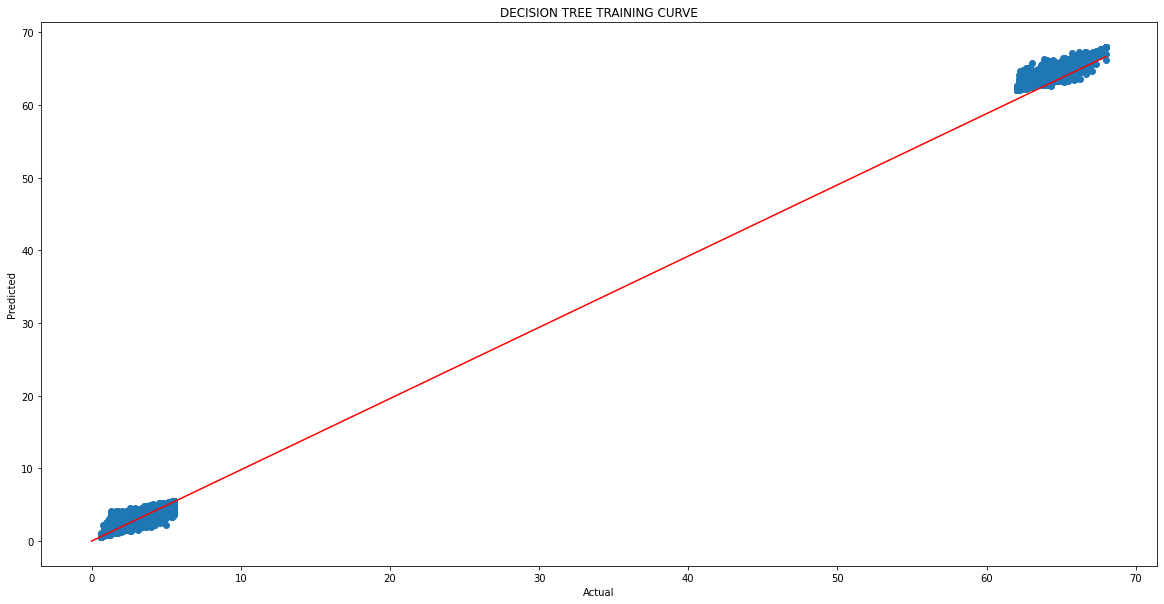

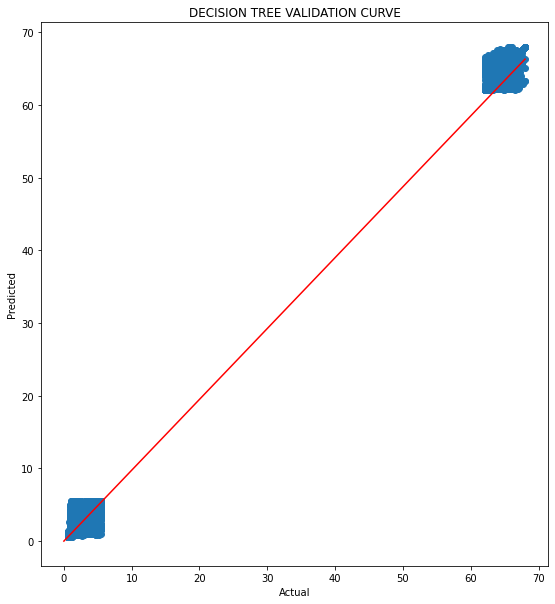

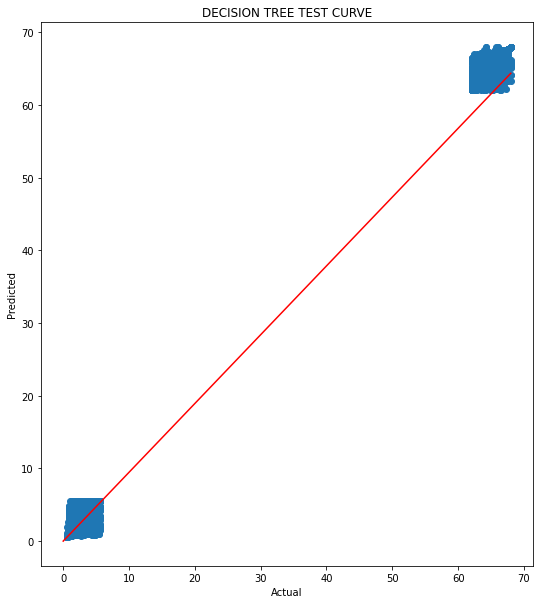

In [0]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="DECISION TREE TRAINING CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_train, y_pred_train)
ax.plot([0,max(y_train['% Iron Concentrate'])], [0,max(y_pred_train[0])], color='r')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
ax.set(title="DECISION TREE VALIDATION CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, y_pred)
ax.plot([0,max(y_cv['% Iron Concentrate'])], [0,max(y_pred[0])], color='r')
fig.show()
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.set(title="DECISION TREE TEST CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_test, y_pred_test)
ax.plot([0,max(y_test['% Iron Concentrate'])], [0,max(y_pred_test[0])], color='r')
fig.show()

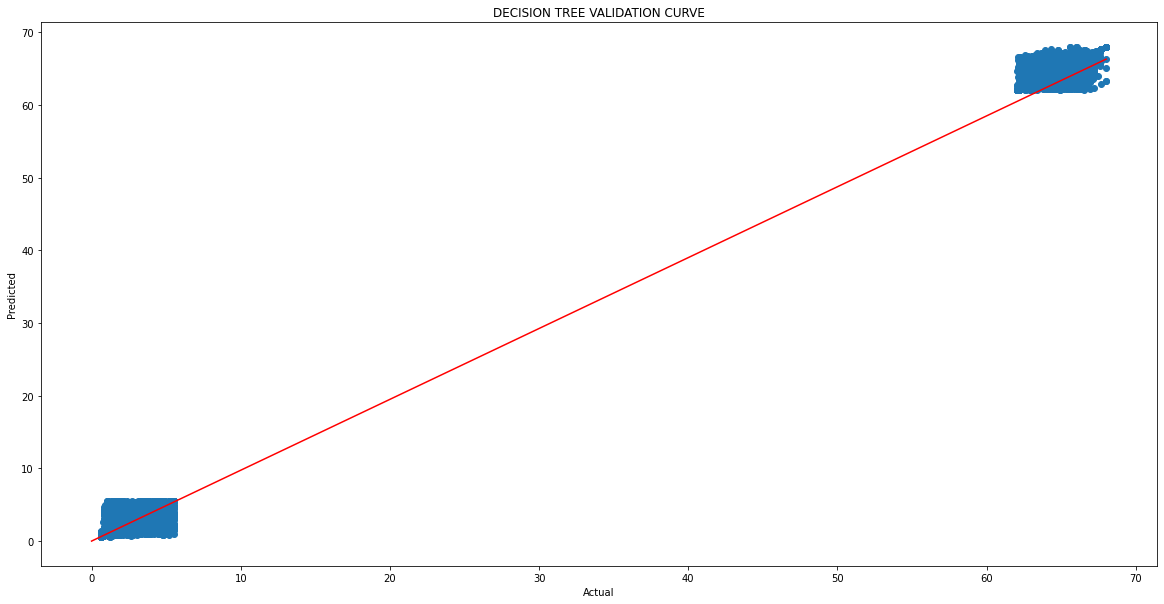

In [0]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="DECISION TREE VALIDATION CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, y_pred)
ax.plot([0,max(y_cv['% Iron Concentrate'])], [0,max(y_pred[0])], color='r')
fig.show()

## **MODEL USING REGRESSOR CHAIN**


In [0]:
from sklearn.multioutput import RegressorChain


In [0]:
clf=DecisionTreeRegressor (max_depth=50,min_samples_split=5)
wrapper1 = RegressorChain(clf)
wrapper1.fit(features_train,y_train)

RegressorChain(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                    criterion='mse',
                                                    max_depth=50,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=5,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
                                                    splitter='best'),
               cv=None, order=None, random_state=None)

## **PREDICTION**


In [0]:
y_pred_cv=wrapper1.predict(features_cv)
y_pred_train=wrapper1.predict(features_train)
y_pred_test=wrapper1.predict(features_test)

## **EVALUATION METRIC**


In [0]:
r2_cv=r2_score(y_pred_cv,y_cv)
r2_train=r2_score(y_pred_train,y_train)
r2_test=r2_score(y_pred_test,y_test)

In [0]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
mse_cv=mean_squared_error(y_cv,y_pred_cv)

In [0]:
r2_train,r2_cv,r2_test,mse_train,mse_cv,mse_test

(0.9908990814437093,
 0.8790498091768016,
 0.8774055851075784,
 0.011506126265385405,
 0.15191380344978905,
 0.1537079542189485)

## **PLOTS**

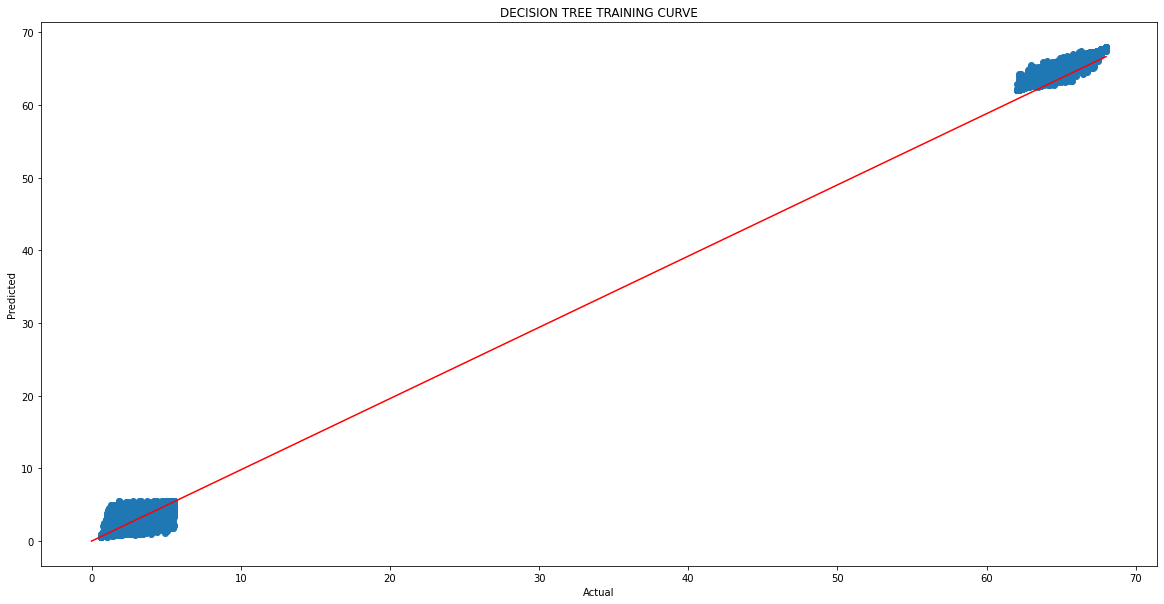

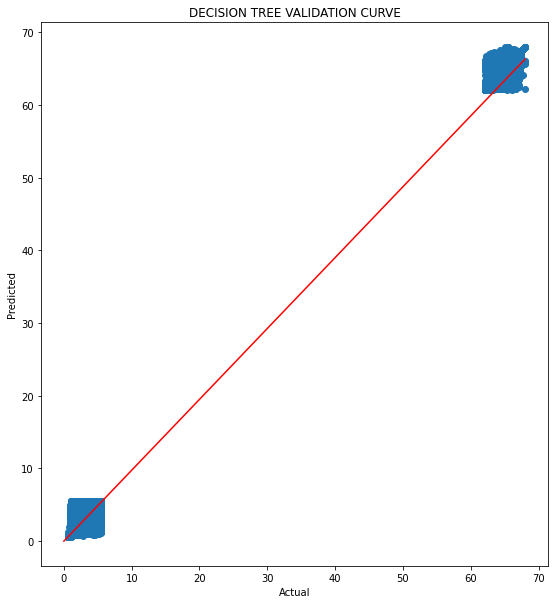

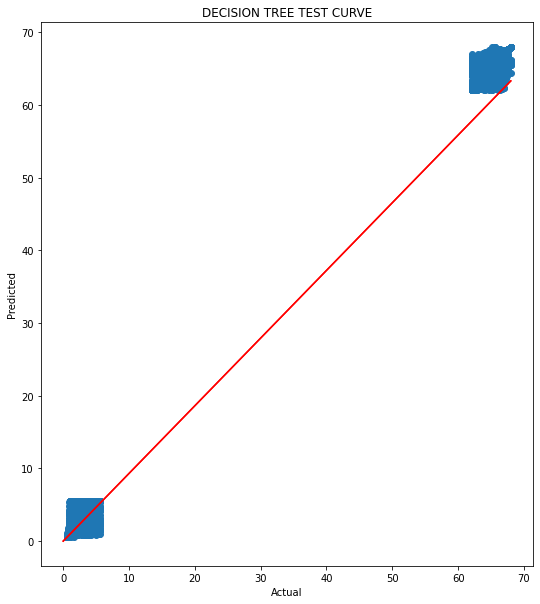

In [0]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="DECISION TREE TRAINING CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_train, y_pred_train)
ax.plot([0,max(y_train['% Iron Concentrate'])], [0,max(y_pred_train[0])], color='r')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
ax.set(title="DECISION TREE VALIDATION CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, y_pred_cv)
ax.plot([0,max(y_cv['% Iron Concentrate'])], [0,max(y_pred[0])], color='r')
fig.show()
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.set(title="DECISION TREE TEST CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_test, y_pred_test)
ax.plot([0,max(y_test['% Iron Concentrate'])], [0,max(y_pred_test[0])], color='r')
ax.plot([0,max(y_test['% Iron Concentrate'])], [0,max(y_pred_test[0])], color='r')
fig.show()

## **REPORT**

In [0]:
#https://pypi.org/project/PrettyTable/-- for representation of data 
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists-- to add the rows in table 
from prettytable import PrettyTable
x = PrettyTable(border=True, header=True, padding_width=15)
x.field_names = ["MODEL1", "R2_TRAIN","R2_CV","R2_TEST","MSE_TRAIN","MSE_CV","MSE_TEST"]
x.add_row(["DECISION TREE MTR",0.996940349079114,
 0.9010834860487484,
 0.9036198036618404, 0.0038556643517233397,
 0.12129044877301248,
 0.12437333275470228
])
x.add_row(["DECISION TREE RIGRESSION CHAIN",0.9908990814437093,
 0.8790498091768016,
 0.8774055851075784,
 0.011506126265385405,                            
 0.15191380344978905,
 0.1537079542189485])

print(x)

+------------------------------------------------------------+------------------------------------------------+------------------------------------------------+------------------------------------------------+---------------------------------------------------+-------------------------------------------------+-------------------------------------------------+
|                           MODEL1                           |                    R2_TRAIN                    |                     R2_CV                      |                    R2_TEST                     |                     MSE_TRAIN                     |                      MSE_CV                     |                     MSE_TEST                    |
+------------------------------------------------------------+------------------------------------------------+------------------------------------------------+------------------------------------------------+---------------------------------------------------+---------------

## **METRIC ANALYSIS**



#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

**R2 SCORE**

Acoording to literature, the r2 score is good when it is closer to 1  and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

TRAIN R2 OF INHERENT MODEL is  so closer to 1 and TEST r2 OF INHERENT MODEL is also  to 1 and hence inorder to get better result , we must try other models 

**MSE VALUE**

A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.



The MSE value and R2 score value is better than ridge and MSE value of INHERENT MODEL is better than REGRESSION CHAIN model.

## **PLOTS ANALYSIS**

1.  INHERENT MTR MODEL

   In train curve, the points tend to overlay on the line and in both iron and silica the points are overfalling on regression line

   In test and validation curve, the models are able to predict iron concetrate and are  able to predict the silica better in the same way for iron concentrate

2. Regressor chain 
  
   In train curve, the points tend to overlay on the line and in both iron and silica the points are overfalling on regression line

   In test  curve, the models are able to predict iron concetrate and are not able to predict the silica better than iron concentrate.

## **CONCLUSION**

INHERENT MTR IS BETTER THAN REGRESSION CHAIN MODEL IN CASE OF DECISION TREE 

**DECISION TREE> XGBOOST> RIDGE**

#**RANDOMFOREST**

## **DATA MODELING**


In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
df=pd.read_csv('/content/drive/My Drive/preprocessed_time')

In [0]:
y = df.iloc[:,23:25]
X = df.drop(['% Silica Concentrate','% Iron Concentrate','index','datetime hours'], axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [0]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,test_size=0.20,random_state=30)

In [0]:
from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler()
features_train = scale_features_std.fit_transform(X_train)
features_test = scale_features_std.transform(X_test)

In [0]:
features_cv = scale_features_std.transform(X_cv)

In [0]:
print(X_train.shape,features_train.shape,X_test.shape,features_test.shape,features_cv.shape,y_train.shape,y_cv.shape,y_test.shape)

(471969, 21) (471969, 21) (147491, 21) (147491, 21) (117993, 21) (471969, 2) (117993, 2) (147491, 2)


## **MODEL FOR MULTIOUTPUT**


In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [0]:
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = RandomizedSearchCV(estimator = rf,param_distributions= param_grid, 
                          cv = 3,n_jobs=-1, verbose = 2)

In [0]:
grid_search.fit(features_train,y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 111.6min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [0]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 1000}

In [0]:
model=RandomForestRegressor(n_estimators=1000,max_depth=100,min_samples_leaf=5,min_samples_split=10,bootstrap=True,max_features=3)

In [0]:
model.fit(features_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features=3, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## **PREDICTION**


In [0]:
y_pred=model.predict(features_cv)
y_pred_train=model.predict(features_train)
y_pred_test=model.predict(features_test)

## **EVALUATION METRIC**


In [0]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_test=mean_squared_error(y_test,y_pred_test)
mse_cv=mean_squared_error(y_cv,y_pred)

r2_train=r2_score(y_train,y_pred_train)

r2_test=r2_score(y_test,y_pred_test)
r2_cv=r2_score(y_cv,y_pred)


In [0]:
r2_train,r2_cv,r2_test,mse_cv,mse_test,mse_train,mse_cv

(0.9404630125734039,
 0.8840832964855059,
 0.8836008488803795,
 0.14586763296600957,
 0.14634928647273932,
 0.0749937491528446,
 0.14586763296600957)

## **PLOTS**

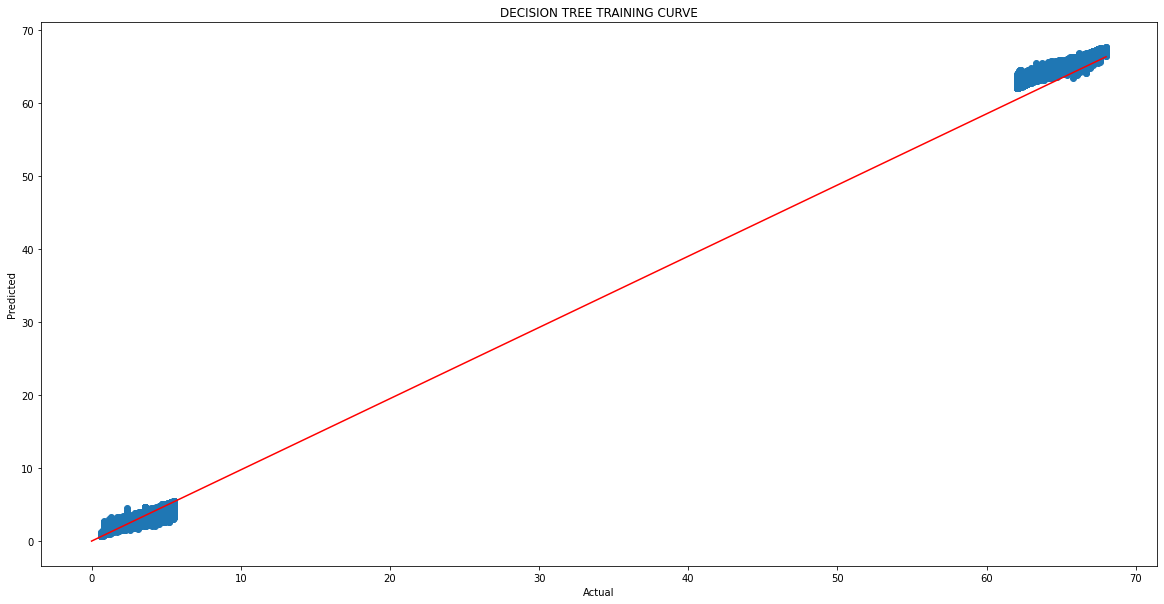

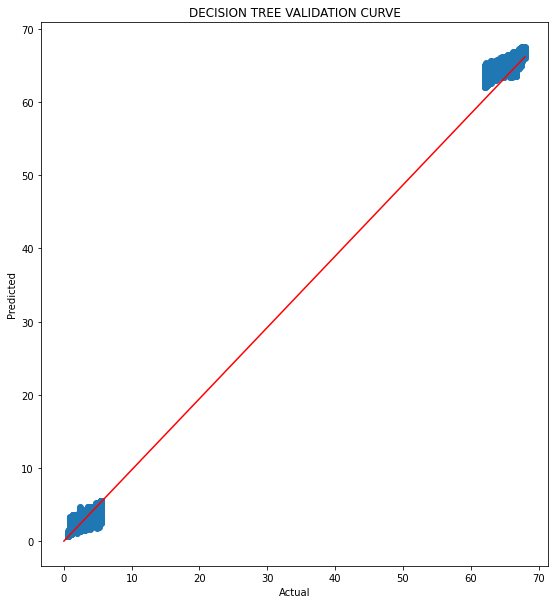

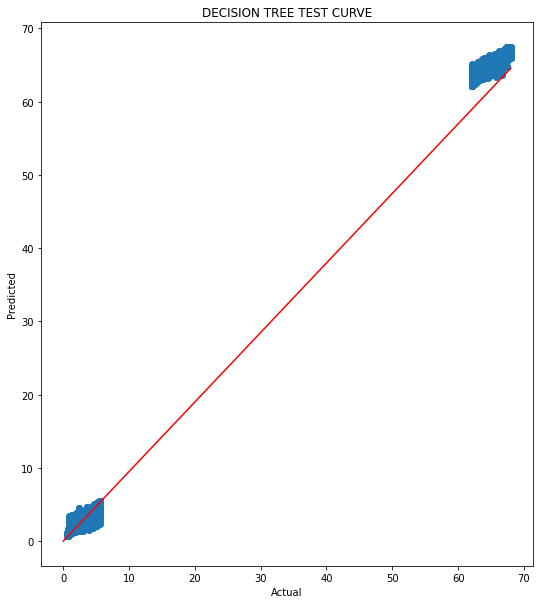

In [0]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="RANDOMFOREST TRAINING CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_train, y_pred_train)
ax.plot([0,max(y_train['% Iron Concentrate'])], [0,max(y_pred_train[0])], color='r')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
ax.set(title="RANDOM FOREST VALIDATION CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, y_pred_cv)
ax.plot([0,max(y_cv['% Iron Concentrate'])], [0,max(y_pred[0])], color='r')
fig.show()
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.set(title="RANDOM FOREST TEST CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_test, y_pred_test)
ax.plot([0,max(y_test['% Iron Concentrate'])], [0,max(y_pred_test[0])], color='r')
ax.plot([0,max(y_test['% Iron Concentrate'])], [0,max(y_pred_test[0])], color='r')
fig.show()

##**REPORT**

In [0]:
#https://pypi.org/project/PrettyTable/-- for representation of data 
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists-- to add the rows in table 
from prettytable import PrettyTable
x = PrettyTable(border=True, header=True, padding_width=15)
x.field_names = ["MODEL1", "R2_TRAIN","R2_CV","R2_TEST","MSE_TRAIN","MSE_CV","MSE_TEST"]

x.add_row(["RANDOM FOREST",0.9404630125734039,
 0.8840832964855059,
 0.8836008488803795, 0.0749937491528446,
 0.14586763296600957,
 0.14634928647273932
])

print(x)

+-------------------------------------------+------------------------------------------------+------------------------------------------------+------------------------------------------------+------------------------------------------------+-------------------------------------------------+-------------------------------------------------+
|                   MODEL1                  |                    R2_TRAIN                    |                     R2_CV                      |                    R2_TEST                     |                   MSE_TRAIN                    |                      MSE_CV                     |                     MSE_TEST                    |
+-------------------------------------------+------------------------------------------------+------------------------------------------------+------------------------------------------------+------------------------------------------------+-------------------------------------------------+-------------------------

## **METRIC ANALYSIS**


#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

**R2 SCORE**

Acoording to literature, the r2 score is good when it is closer to 1  and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

TRAIN R2 is  so closer to 1 and TEST r2 is also  to 1 and hence inorder to get better result , we must try other models 

**MSE VALUE**

A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.





## **PLOTS ANALYSIS**

1.  INHERENT MTR MODEL

   In train curve, the points tend to overlay on the line and in both iron and silica the points are overfalling on regression line

   In test and validation curve, the models are able to predict iron concetrate and are  able to predict the silica better in the same way for iron concentrate


## **CONCLUSION**

INHERENT RANDOMFOREST  MTR IS BETTER THAN OTHER MODELS

**RANDOMFOREST> DECISION TREE> XGBOOST> RIDGE**

#**ADABOOST**

## **DATA MODELING**


In [0]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

In [0]:
import pandas as pd

In [0]:
df=pd.read_csv('/content/drive/My Drive/preprocessed_time')

In [0]:
y = df.iloc[:,23:25]
X = df.drop(['% Silica Concentrate','% Iron Concentrate','index','datetime hours'], axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=30)

In [0]:
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train,test_size=0.20,random_state=30)

In [0]:
from sklearn.preprocessing import StandardScaler
scale_features_std = StandardScaler()
features_train = scale_features_std.fit_transform(X_train)
features_test = scale_features_std.transform(X_test)

In [0]:
features_cv = scale_features_std.transform(X_cv)

In [0]:
print(X_train.shape,features_train.shape,X_test.shape,features_test.shape,features_cv.shape,y_train.shape,y_cv.shape,y_test.shape)

(471969, 21) (471969, 21) (147491, 21) (147491, 21) (117993, 21) (471969, 2) (117993, 2) (147491, 2)


In [0]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

In [0]:
param_dist = {
 'n_estimators': [50, 100],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 }

pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

In [0]:
pre_gs_inst.fit(features_train, y_train)

/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=AdaBoostRegressor(base_estimator=None,
                                               learning_rate=1.0, loss='linear',
                                               n_estimators=50,
                                               random_state=None),
                   iid='deprecated', n_iter=10, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.3,
                                                          1],
                                        'n_estimators': [50, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

## **MODEL USING MULTIOUTPUTREGRESSOR**


In [0]:
regr_1 = DecisionTreeRegressor(max_depth=50,min_samples_split=5)

regr_2 = AdaBoostRegressor(regr_1,n_estimators=50,learning_rate=1)


In [0]:
from sklearn.multioutput import MultiOutputRegressor

In [0]:
model=MultiOutputRegressor(regr_2)
model.fit(features_train,y_train)

MultiOutputRegressor(estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                                      criterion='mse',
                                                                                      max_depth=50,
                                                                                      max_features=None,
                                                                                      max_leaf_nodes=None,
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                                                                                      min_samples_leaf=1,
                                                                                      min_samples_split=5,
                                               

## **PREDICTION**


In [0]:
y_pred=model.predict(features_cv)
y_pred_train=model.predict(features_train)
y_pred_test=model.predict(features_test)

## **EVALUATION METRIC**


In [0]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_cv=mean_squared_error(y_cv,y_pred)
mse_test=mean_squared_error(y_test,y_pred_test)

In [0]:
r2_train=r2_score(y_train,y_pred_train)
r2_cv=r2_score(y_cv,y_pred)
r2_test=r2_score(y_test,y_pred_test)

In [0]:
r2_train,r2_cv,r2_test,mse_cv,mse_test,mse_train,mse_cv

(0.9989177977576809,
 0.9750738456318357,
 0.9745449086918032,
 0.03139462458532873,
 0.03203487819099303,
 0.0013715157924193923,
 0.03139462458532873)

## **PLOTS**

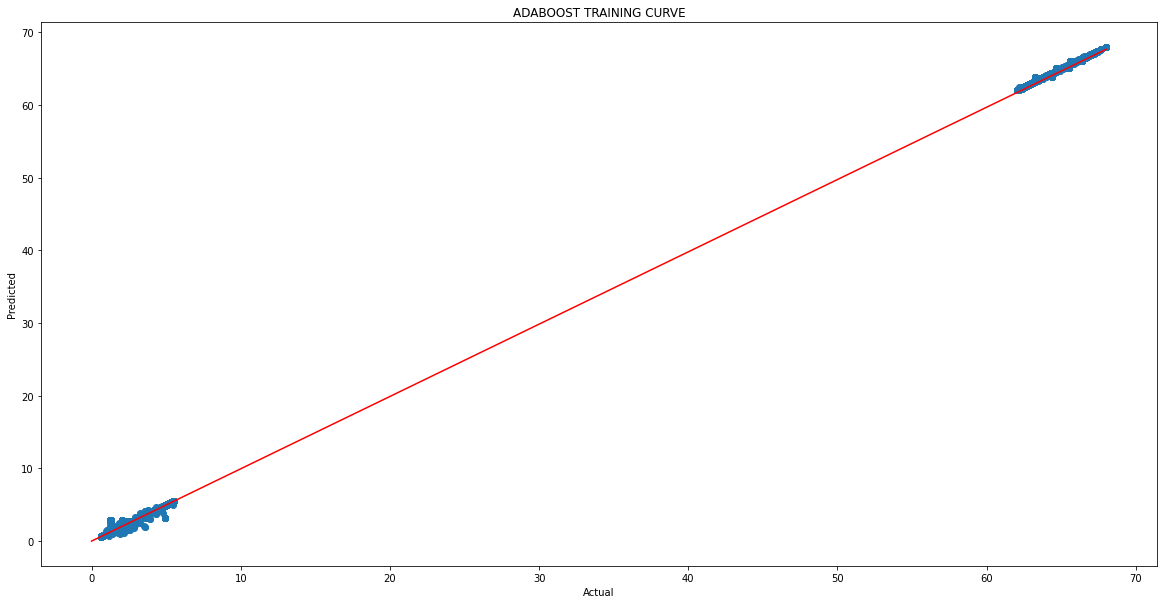

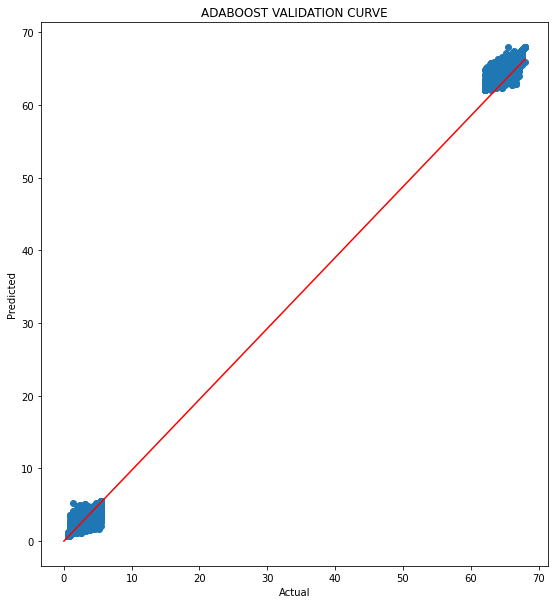

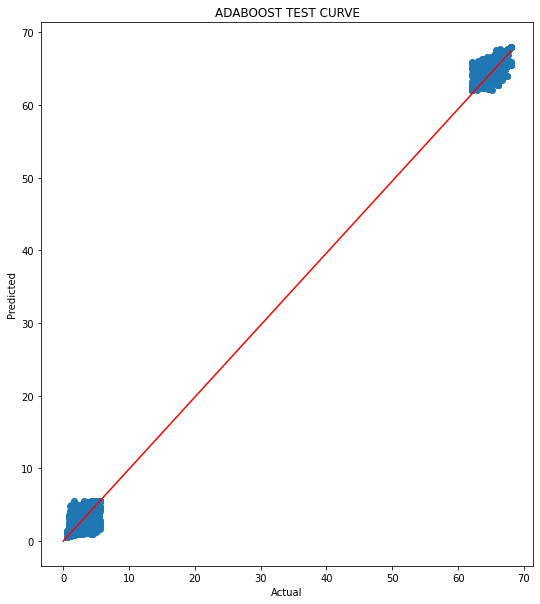

In [0]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="ADABOOST TRAINING CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_train, y_pred_train)
ax.plot([0,max(y_train['% Iron Concentrate'])], [0,max(y_pred_train[0])], color='r')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
ax.set(title="ADABOOST VALIDATION CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, y_pred)
ax.plot([0,max(y_cv['% Iron Concentrate'])], [0,max(y_pred[0])], color='r')
fig.show()
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.set(title="ADABOOST TEST CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_test, y_pred_test)
ax.plot([0,max(y_test['% Iron Concentrate'])], [0,max(y_pred_test[0])], color='r')
fig.show()

## **MODEL USING REGRESSOR CHAIN**


In [0]:
from sklearn.multioutput import RegressorChain

In [0]:
model= AdaBoostRegressor(regr_1,n_estimators=50,learning_rate=1)
wrapper1 = RegressorChain(model)
wrapper1.fit(features_train,y_train)

RegressorChain(base_estimator=AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                                                     criterion='mse',
                                                                                     max_depth=50,
                                                                                     max_features=None,
                                                                                     max_leaf_nodes=None,
                                                                                     min_impurity_decrease=0.0,
                                                                                     min_impurity_split=None,
                                                                                     min_samples_leaf=1,
                                                                                     min_samples_split=5,
                                                        

## **PREDICTION**


In [0]:
y_pred_cv=wrapper1.predict(features_cv)
y_pred_train=wrapper1.predict(features_train)
y_pred_test=wrapper1.predict(features_test)

## **EVALUATION METRIC**


In [0]:
r2_cv=r2_score(y_pred_cv,y_cv)
r2_train=r2_score(y_pred_train,y_train)
r2_test=r2_score(y_pred_test,y_test)

In [0]:
mse_train=mean_squared_error(y_train,y_pred_train)
mse_cv=mean_squared_error(y_cv,y_pred)
mse_test=mean_squared_error(y_test,y_pred_test)

In [0]:
r2_train,r2_cv,r2_test,mse_train,mse_cv,mse_test

(0.9991389949078793,
 0.9745304869923623,
 0.9733092536247556,
 0.0010902161013306814,
 0.03139462458532873,
 0.03293804176581637)

## **PLOTS**


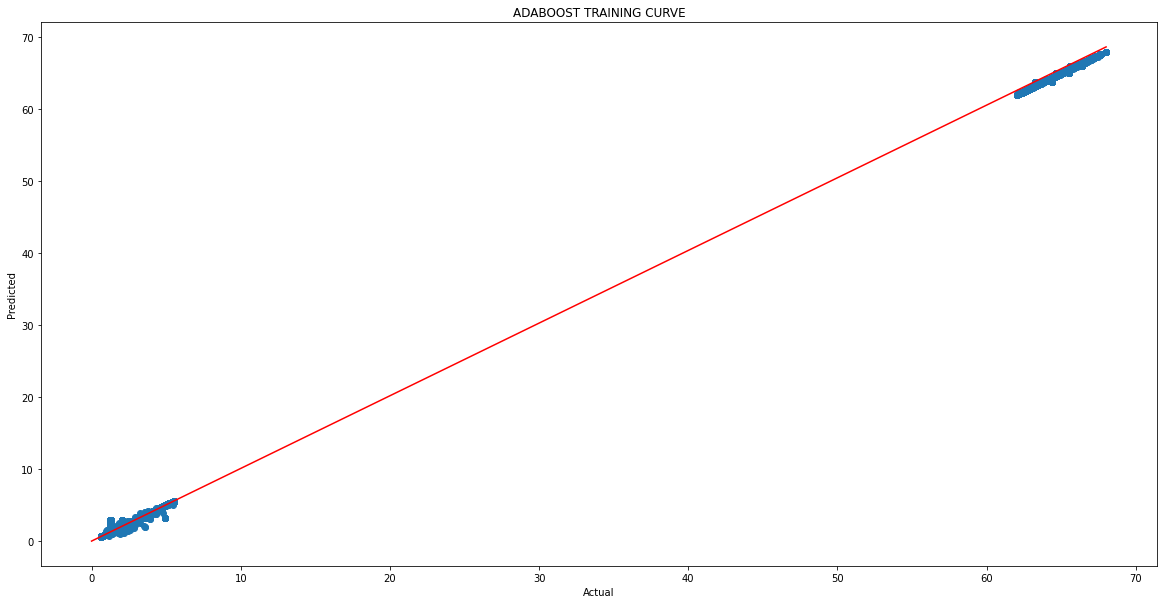

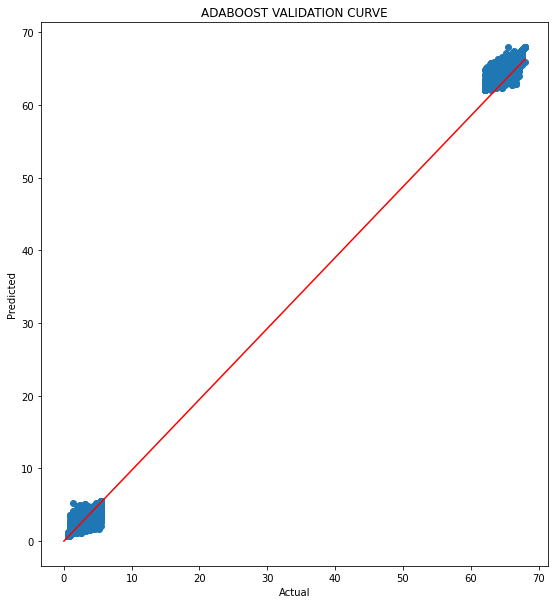

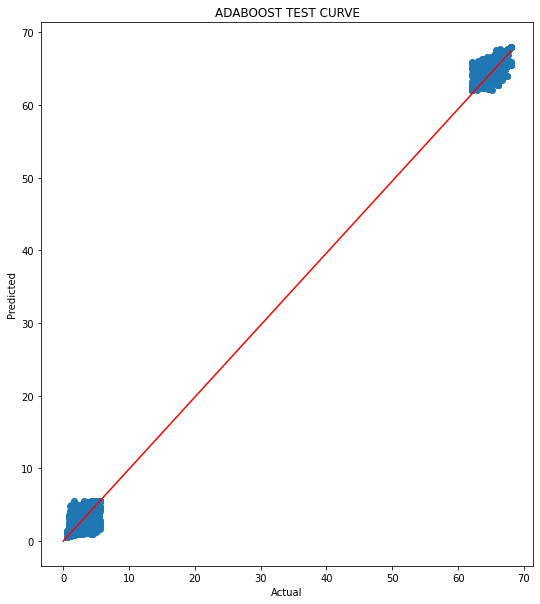

In [0]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111)
ax.set(title="ADABOOST TRAINING CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_train, y_pred_train)
ax.plot([0,max(y_train['% Iron Concentrate'])], [0,max(y_pred_train[0])], color='r')
fig.show()
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(121)
ax.set(title="ADABOOST VALIDATION CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_cv, y_pred)
ax.plot([0,max(y_cv['% Iron Concentrate'])], [0,max(y_pred[0])], color='r')
fig.show()
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(131)
ax.set(title="ADABOOST TEST CURVE", xlabel="Actual", ylabel="Predicted")
ax.scatter(y_test, y_pred_test)
ax.plot([0,max(y_test['% Iron Concentrate'])], [0,max(y_pred_test[0])], color='r')
fig.show()

## **REPORT**

In [0]:
#https://pypi.org/project/PrettyTable/-- for representation of data 
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists-- to add the rows in table 
from prettytable import PrettyTable
x = PrettyTable(border=True, header=True, padding_width=15)
x.field_names = ["MODEL1", "R2_TRAIN","R2_CV","R2_TEST","MSE_TRAIN","MSE_CV","MSE_TEST"]
x.add_row(["ADABOOST MTR",0.9989177977576809,
 0.9750738456318357,
 0.9745449086918032, 0.0013715157924193923,
 0.03139462458532873,
 0.03203487819099303


])
x.add_row(["ADABOOST RIGRESSION CHAIN",0.9991389949078793,
 0.9745304869923623,
 0.9733092536247556,
 0.0010902161013306814,
 0.03139462458532873,
 0.03293804176581637])

print(x)

+-------------------------------------------------------+------------------------------------------------+------------------------------------------------+------------------------------------------------+---------------------------------------------------+-------------------------------------------------+-------------------------------------------------+
|                         MODEL1                        |                    R2_TRAIN                    |                     R2_CV                      |                    R2_TEST                     |                     MSE_TRAIN                     |                      MSE_CV                     |                     MSE_TEST                    |
+-------------------------------------------------------+------------------------------------------------+------------------------------------------------+------------------------------------------------+---------------------------------------------------+------------------------------

## **METRIC ANALYSIS**



#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html?highlight=r2#sklearn.metrics.r2_score
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

**R2 SCORE**

Acoording to literature, the r2 score is good when it is closer to 1  and it can be negative (because the model can be arbitrarily worse). A constant model that always predicts the expected value of y, disregarding the input features, would get a R^2 score of 0.0.

TRAIN R2 is  so closer to 0 and TEST r2 is also  to 0 and hence inorder to get better result , we must try other models 

**MSE VALUE**

A non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.



The MSE value and R2 score value is better than ridge and MSE value of MTR is same as  REGRESSION CHAIN model.


## **PLOTS ANALYSIS**


1.  MTR MODEL

   In train curve, the points tend to overlay on the line and in both iron and silica the points are overfalling on regression line

   In test and validation curve, the models are able to predict iron concetrate and are  able to predict the silica better in the same way for iron concentrate

2. Regressor chain 
  
   In train curve, the points tend to overlay on the line and in both iron and silica the points are overfalling on regression line

   In test  curve, the models are able to predict iron concetrate and are able to predict the silica the same way of iron concentrate.

## **CONCLUSION**

AdaBoost model can be used for quality prediction. It
shows the scatter plot of the model that predicts two target
variables: silica and iron concentrates by AdaBoost regressor.

**ADABOOST>RANDOMFOREST>DECISION TREE>XGBOOST>RIDGE**

#**OVERALL COMPARSION**

In [0]:
#https://pypi.org/project/PrettyTable/-- for representation of data 
#https://stackoverflow.com/questions/36423259/how-to-use-pretty-table-in-python-to-print-out-data-from-multiple-lists-- to add the rows in table 
from prettytable import PrettyTable
x = PrettyTable(border=True, header=True, padding_width=15)
x.field_names = ["MODEL1", "R2","MSE"]
x.add_row(["ADABOOST",0.9745449086918032,0.03203487819099303])
x.add_row(["RANDOMFOREST",0.9404630125734039,0.0749937491528446])
x.add_row(["DECISION TREE", 0.9036198036618404,0.12437333275470228])
x.add_row(["XGBOOST", 0.7750269140015339,0.2641687929200151])
x.add_row(["RIDGE",  0.1457070772811201,  1.0722436207597437 ])


print(x)

+-------------------------------------------+------------------------------------------------+-------------------------------------------------+
|                   MODEL1                  |                       R2                       |                       MSE                       |
+-------------------------------------------+------------------------------------------------+-------------------------------------------------+
|                  ADABOOST                 |               0.9745449086918032               |               0.03203487819099303               |
|                RANDOMFOREST               |               0.9404630125734039               |                0.0749937491528446               |
|               DECISION TREE               |               0.9036198036618404               |               0.12437333275470228               |
|                  XGBOOST                  |               0.7750269140015339               |                0.2641687929200151  

##**RESULTS IN PAPER VS OUR MODEL RESULTS**

**RESULT IN RESERACH PAPER**
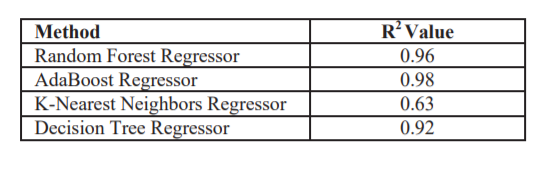


**OUR RESULTS**

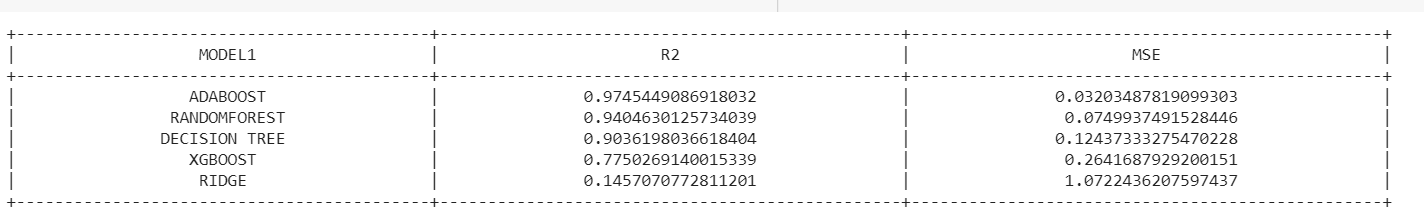


##**PLOTS IN PAPER VS OUR RESULTS**(ADABOOST ALONE)

                  **PLOTS IIN PAPER**

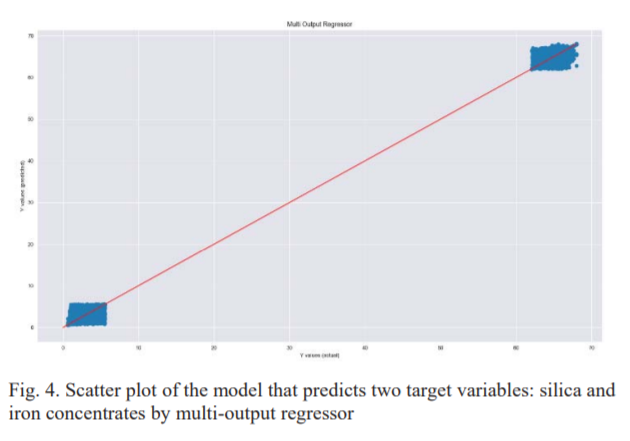

##**PLOTS OBTAINED**

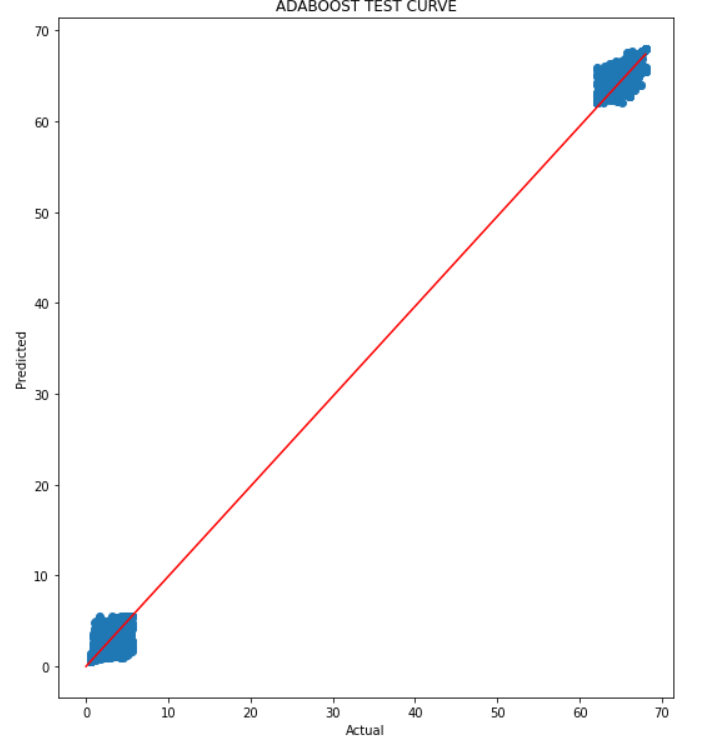

#**SUMMARY**



The experimental results show that AdaBoost regressor
clearly provided higher coefficient of determination value
than other algorithms. This is probably because AdaBoost is
an ensemble method, which generally provides better
accuracies than an individual model by averaging the
decisions of several predictors. In addition, AdaBoost is an
iterative algorithm, each time reweighting the instances in the
dataset to focus the next classifier on incorrectly classified
ones. By this way, it constructs a strong classifier from a
combination of weak classifiers. 

Our Results match with research paper results . In reerach paper also ADABOOST is the best model likewise in our study also our best model is ADABOOST.

The experimental results demonstrate the superiority of AdaBoost .


Another ensemble learning algorithm, Random Forest,
also obtained a high score 0.96 which is very close to the best
value. So, Random Forest can also be used alternatively,
especially when there are many input variables, since it
randomly selects the subset of the features, which decreases
the running time of the algorithm.
It can be observed from table that Decision Tree
method has also acceptable accuracy. However, ensemble
based methods (AdaBoost and Random Forest) have higher
accuracy with respect to this method.
According to the results given in Table the RIDGE method is not suitable to be the base learner for
multi-output regressor because it performs significantly
worse than decision tree based methods. 


In this study, a multi-target regression problem is handled
to predict quality in a mining process. The aim is to construct
a robust model that simultaneously estimates the amount of
silica and iron concentrates in the ore. Several approaches are
implemented and compared to be able to handle more than
one target variable. We tried to observe the performance of a
multi target regression approach when target features are
highly correlated. At the end, it is noticed that this approach
can also be efficient in manufacturing data when a related
attribute is not given to the algorithm as an input parameter.
Instead, that feature can also be evaluated as an output
variable by being added to the existing target feature. We
have observed that this alteration did not create an adverse
effect on the regression performance. 